# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: M Mahfudl Awaludin
- Email: mahfudlawaludin.26@gmail.com

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
# Library untuk manipulasi data
import numpy as np
import pandas as pd

# Library untuk analisis statistik dan ilmiah
import scipy

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook (tidak perlu diimport jika hanya digunakan sebagai environment, tapi kalau kamu mau pakai magic command bisa begini:)
# %matplotlib inline  # Hanya untuk Jupyter Notebook

# Library untuk koneksi ke database
import sqlalchemy

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Menyimpan dan memuat model
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

**Deskripsi Umum Dataset**

Dataset ini terdiri dari 4424 entri (baris) dan 37 atribut (kolom). Dataset ini tampaknya merepresentasikan informasi mengenai mahasiswa di suatu institusi pendidikan tinggi, dengan atribut yang mencakup latar belakang pribadi, akademik, ekonomi, dan sosial, serta status akhir mahasiswa (Status). Dataset ini bisa digunakan untuk keperluan analisis dropout, performa akademik, atau prediksi status kelulusan mahasiswa.

Detail Setiap Kolom :

1. Marital_status (int64)
Status pernikahan mahasiswa. Representasi numerik (misalnya: 1 = lajang, 2 = menikah, dst).

2. Application_mode (int64)
Metode atau jalur pendaftaran mahasiswa ke universitas. Biasanya dikodekan dengan angka (misalnya: SNMPTN, SBMPTN, Mandiri, dll dalam bentuk kode).

3. Application_order (int64)
Urutan prioritas pilihan program studi saat mendaftar. Nilai kecil berarti pilihan pertama.

4. Course (int64)
Kode dari program studi atau jurusan yang diambil oleh mahasiswa.

5. Daytime_evening_attendance (int64)
Waktu kehadiran kuliah:
- 1 = Siang (Daytime)
- 0 = Sore/Malam (Evening)

6. Previous_qualification (int64)
Jenis pendidikan terakhir sebelum masuk universitas (misalnya SMA, SMK, diploma, dll – dikodekan).

7. Previous_qualification_grade (float64)
Nilai akhir dari pendidikan sebelumnya.

8. Nacionality (int64)
Kewarganegaraan mahasiswa, dikodekan secara numerik.

9. Mothers_qualification (int64)
Tingkat pendidikan ibu (dalam bentuk kode).

10. Fathers_qualification (int64)
Tingkat pendidikan ayah (dalam bentuk kode).

11. Mothers_occupation (int64)
Jenis pekerjaan ibu (kode numerik).

12. Fathers_occupation (int64)
Jenis pekerjaan ayah (kode numerik).

13. Admission_grade (float64)
Nilai masuk atau nilai ujian saat mahasiswa diterima di universitas.

14. Displaced (int64)
Apakah mahasiswa berasal dari daerah konflik atau pengungsi (0 = tidak, 1 = ya).

15. Educational_special_needs (int64)
Menunjukkan apakah mahasiswa memiliki kebutuhan pendidikan khusus (0 = tidak, 1 = ya).

16. Debtor (int64)
Apakah mahasiswa memiliki tunggakan atau utang pada institusi (0 = tidak, 1 = ya).

17. Tuition_fees_up_to_date (int64)
Apakah mahasiswa membayar uang kuliah tepat waktu (1 = ya, 0 = tidak).

18. Gender (int64)
Jenis kelamin mahasiswa, dikodekan (biasanya 0 = perempuan, 1 = laki-laki, atau sebaliknya tergantung kode).

19. Scholarship_holder (int64)
Apakah mahasiswa adalah penerima beasiswa (1 = ya, 0 = tidak).

20. Age_at_enrollment (int64)
Umur mahasiswa saat pertama kali masuk universitas.

21. International (int64)
Apakah mahasiswa merupakan mahasiswa internasional (1 = ya, 0 = tidak).

Data Akademik Semester 1:
22. Curricular_units_1st_sem_credited (int64)
Jumlah mata kuliah di semester 1 yang diklaim atau diakui kreditnya.

23. Curricular_units_1st_sem_enrolled (int64)
Jumlah mata kuliah yang diambil mahasiswa pada semester 1.

24. Curricular_units_1st_sem_evaluations (int64)
Jumlah evaluasi (ujian, tugas, dsb) yang diikuti pada semester 1.

25. Curricular_units_1st_sem_approved (int64)
Jumlah mata kuliah yang dinyatakan lulus di semester 1.

26. Curricular_units_1st_sem_grade (float64)
Rata-rata nilai semester 1.

27. Curricular_units_1st_sem_without_evaluations (int64)
Jumlah mata kuliah semester 1 yang tidak diikuti evaluasinya.

Data Akademik Semester 2:
28. Curricular_units_2nd_sem_credited (int64)
Jumlah mata kuliah semester 2 yang diakui kreditnya.

29. Curricular_units_2nd_sem_enrolled (int64)
Jumlah mata kuliah yang diambil di semester 2.

30. Curricular_units_2nd_sem_evaluations (int64)
Jumlah evaluasi di semester 2.

31. Curricular_units_2nd_sem_approved (int64)
Jumlah mata kuliah semester 2 yang lulus.

32. Curricular_units_2nd_sem_grade (float64)
Rata-rata nilai semester 2.

33. Curricular_units_2nd_sem_without_evaluations (int64)
Jumlah mata kuliah semester 2 yang tidak diikuti evaluasi.

Kondisi Ekonomi Makro (Saat Mahasiswa Aktif):
34. Unemployment_rate (float64)
Tingkat pengangguran di negara/daerah saat mahasiswa aktif kuliah.

35. Inflation_rate (float64)
Tingkat inflasi yang berlaku saat itu.

36. GDP (float64)
Produk Domestik Bruto (dalam skala tertentu), sebagai indikator ekonomi negara saat itu.

37. Status (object)
Target/output label dari dataset ini. Menunjukkan status akhir mahasiswa, seperti:

- "Enrolled" = Masih aktif kuliah
- "Graduate" = Lulus
- "Dropout" = Mengundurkan diri atau dikeluarkan


1. Loading Dataset

In [3]:
df = pd.read_csv("data.csv", delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


2. Pemetaan dan Pengubahan Nama Kolom Data ke Bahasa Indonesia

In [4]:
# Membuat dictionary untuk pemetaan kolom lama ke kolom baru dalam Bahasa Indonesia
column_mapping = {
    'Marital_status': 'Status_perkawinan',
    'Application_mode': 'Mode_pendaftaran',
    'Application_order': 'Urutan_pendaftaran',
    'Course': 'Program_studi',
    'Daytime_evening_attendance': 'Waktu_kuliah',
    'Previous_qualification': 'Kualifikasi_sebelumnya',
    'Previous_qualification_grade': 'Nilai_kualifikasi_sebelumnya',
    'Nacionality': 'Kewarganegaraan',
    'Mothers_qualification': 'Kualifikasi_ibu',
    'Fathers_qualification': 'Kualifikasi_ayah',
    'Mothers_occupation': 'Pekerjaan_ibu',
    'Fathers_occupation': 'Pekerjaan_ayah',
    'Admission_grade': 'Nilai_penerimaan',
    'Displaced': 'Pengungsi',
    'Educational_special_needs': 'Kebutuhan_pendidikan_khusus',
    'Debtor': 'Debitor',
    'Tuition_fees_up_to_date': 'Biaya_kuliah_terbaru',
    'Gender': 'Jenis_kelamin',
    'Scholarship_holder': 'Penerima_beasiswa',
    'Age_at_enrollment': 'Usia_saat_daftar',
    'International': 'Internasional',
    'Curricular_units_1st_sem_credited': 'Unit_kurikuler_semester_1_dikreditkan',
    'Curricular_units_1st_sem_enrolled': 'Unit_kurikuler_semester_1_daftar',
    'Curricular_units_1st_sem_evaluations': 'Evaluasi_unit_kurikuler_semester_1',
    'Curricular_units_1st_sem_approved': 'Unit_kurikuler_semester_1_disetujui',
    'Curricular_units_1st_sem_grade': 'Nilai_unit_kurikuler_semester_1',
    'Curricular_units_1st_sem_without_evaluations': 'Unit_kurikuler_semester_1_tanpa_evaluasi',
    'Curricular_units_2nd_sem_credited': 'Unit_kurikuler_semester_2_dikreditkan',
    'Curricular_units_2nd_sem_enrolled': 'Unit_kurikuler_semester_2_daftar',
    'Curricular_units_2nd_sem_evaluations': 'Evaluasi_unit_kurikuler_semester_2',
    'Curricular_units_2nd_sem_approved': 'Unit_kurikuler_semester_2_disetujui',
    'Curricular_units_2nd_sem_grade': 'Nilai_unit_kurikuler_semester_2',
    'Curricular_units_2nd_sem_without_evaluations': 'Unit_kurikuler_semester_2_tanpa_evaluasi',
    'Unemployment_rate': 'Tingkat_pengangguran',
    'Inflation_rate': 'Tingkat_inflasi',
    'GDP': 'PDB',
    'Status': 'Status'
}

# Mengubah nama kolom sesuai dengan dictionary yang telah dibuat
df = df.rename(columns=column_mapping)

# Menampilkan info DataFrame setelah pengubahan nama kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Status_perkawinan                         4424 non-null   int64  
 1   Mode_pendaftaran                          4424 non-null   int64  
 2   Urutan_pendaftaran                        4424 non-null   int64  
 3   Program_studi                             4424 non-null   int64  
 4   Waktu_kuliah                              4424 non-null   int64  
 5   Kualifikasi_sebelumnya                    4424 non-null   int64  
 6   Nilai_kualifikasi_sebelumnya              4424 non-null   float64
 7   Kewarganegaraan                           4424 non-null   int64  
 8   Kualifikasi_ibu                           4424 non-null   int64  
 9   Kualifikasi_ayah                          4424 non-null   int64  
 10  Pekerjaan_ibu                       

**Eksplanatory Data Analisis (EDA)**

3. Menampilkan Statistik Deskriptif dari DataFrame

In [5]:
df.describe()

,Status_perkawinan,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Nilai_kualifikasi_sebelumnya,Kewarganegaraan,Kualifikasi_ibu,Kualifikasi_ayah,...,Unit_kurikuler_semester_1_tanpa_evaluasi,Unit_kurikuler_semester_2_dikreditkan,Unit_kurikuler_semester_2_daftar,Evaluasi_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_disetujui,Nilai_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_tanpa_evaluasi,Tingkat_pengangguran,Tingkat_inflasi,PDB
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


4. Menghapus Duplikasi Data pada DataFrame

In [6]:
# Menghapus duplikasi jika ada
df = df.drop_duplicates()

5. Memeriksa Nilai yang Hilang pada Dataset

In [7]:
df.isnull().sum()

Status_perkawinan                           0
Mode_pendaftaran                            0
Urutan_pendaftaran                          0
Program_studi                               0
Waktu_kuliah                                0
Kualifikasi_sebelumnya                      0
Nilai_kualifikasi_sebelumnya                0
Kewarganegaraan                             0
Kualifikasi_ibu                             0
Kualifikasi_ayah                            0
Pekerjaan_ibu                               0
Pekerjaan_ayah                              0
Nilai_penerimaan                            0
Pengungsi                                   0
Kebutuhan_pendidikan_khusus                 0
Debitor                                     0
Biaya_kuliah_terbaru                        0
Jenis_kelamin                               0
Penerima_beasiswa                           0
Usia_saat_daftar                            0
Internasional                               0
Unit_kurikuler_semester_1_dikredit

6. Menghitung Jumlah Nilai Unik pada Setiap Kolom

In [8]:
print(df.nunique())

Status_perkawinan                             6
Mode_pendaftaran                             18
Urutan_pendaftaran                            8
Program_studi                                17
Waktu_kuliah                                  2
Kualifikasi_sebelumnya                       17
Nilai_kualifikasi_sebelumnya                101
Kewarganegaraan                              21
Kualifikasi_ibu                              29
Kualifikasi_ayah                             34
Pekerjaan_ibu                                32
Pekerjaan_ayah                               46
Nilai_penerimaan                            620
Pengungsi                                     2
Kebutuhan_pendidikan_khusus                   2
Debitor                                       2
Biaya_kuliah_terbaru                          2
Jenis_kelamin                                 2
Penerima_beasiswa                             2
Usia_saat_daftar                             46
Internasional                           

7. Mengonversi Tipe Data Kolom Kategorikal dan Numerikal pada DataFrame

In [9]:
import pandas as pd

# Misal dataframe kamu bernama df
# df = pd.read_csv("nama_file.csv")

# Kolom-kolom kategorikal
categorical_columns = [
    'Status_perkawinan', 'Mode_pendaftaran', 'Urutan_pendaftaran', 'Program_studi',
    'Waktu_kuliah', 'Kualifikasi_sebelumnya', 'Kewarganegaraan', 'Kualifikasi_ibu',
    'Kualifikasi_ayah', 'Pekerjaan_ibu', 'Pekerjaan_ayah', 'Pengungsi',
    'Kebutuhan_pendidikan_khusus', 'Debitor', 'Biaya_kuliah_terbaru',
    'Jenis_kelamin', 'Penerima_beasiswa', 'Internasional', 'Status'
]

# Kolom-kolom numerikal
numerical_columns = [
    'Nilai_kualifikasi_sebelumnya', 'Nilai_penerimaan', 'Usia_saat_daftar',
    'Unit_kurikuler_semester_1_dikreditkan', 'Unit_kurikuler_semester_1_daftar',
    'Evaluasi_unit_kurikuler_semester_1', 'Unit_kurikuler_semester_1_disetujui',
    'Nilai_unit_kurikuler_semester_1', 'Unit_kurikuler_semester_1_tanpa_evaluasi',
    'Unit_kurikuler_semester_2_dikreditkan', 'Unit_kurikuler_semester_2_daftar',
    'Evaluasi_unit_kurikuler_semester_2', 'Unit_kurikuler_semester_2_disetujui',
    'Nilai_unit_kurikuler_semester_2', 'Unit_kurikuler_semester_2_tanpa_evaluasi',
    'Tingkat_pengangguran', 'Tingkat_inflasi', 'PDB'
]

# Mengubah tipe data
df[categorical_columns] = df[categorical_columns].astype('category')
df[numerical_columns] = df[numerical_columns].astype('float')

# Cek hasil
print(df.dtypes)


Status_perkawinan                           category
Mode_pendaftaran                            category
Urutan_pendaftaran                          category
Program_studi                               category
Waktu_kuliah                                category
Kualifikasi_sebelumnya                      category
Nilai_kualifikasi_sebelumnya                 float64
Kewarganegaraan                             category
Kualifikasi_ibu                             category
Kualifikasi_ayah                            category
Pekerjaan_ibu                               category
Pekerjaan_ayah                              category
Nilai_penerimaan                             float64
Pengungsi                                   category
Kebutuhan_pendidikan_khusus                 category
Debitor                                     category
Biaya_kuliah_terbaru                        category
Jenis_kelamin                               category
Penerima_beasiswa                           ca

8. Menampilkan Jumlah Frekuensi Nilai pada Kolom Kategorikal

In [10]:
for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Status_perkawinan:
Status_perkawinan
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

Mode_pendaftaran:
Mode_pendaftaran
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
27       1
57       1
Name: count, dtype: int64

Urutan_pendaftaran:
Urutan_pendaftaran
1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: count, dtype: int64

Program_studi:
Program_studi
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

Waktu_kuliah:
Waktu_kuliah
1    3941
0     483
Name: count, dtype: int64

Kualifikasi_sebelumnya:
Kualifikasi_sebelumnya
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6

9. Mapping Nilai Kategorikal ke Label yang Lebih Deskriptif

In [11]:
# Import pandas jika belum
import pandas as pd

# Mapping untuk kolom-kolom kategori
mapping = {
    'Status_perkawinan': {
        1: 'Menikah',
        2: 'Belum Menikah',
        3: 'Cerai',
        4: 'Janda',
        5: 'Duda',
        6: 'Status Tidak Diketahui'
    },
    'Mode_pendaftaran': {
        1: 'Online',
        17: 'Offline',
        39: 'Fakultas',
        43: 'Pos Terbuka',
        44: 'Internasional',
        7: 'Transfer',
        18: 'Program Lain',
        42: 'Program Beasiswa',
        51: 'Pendaftaran Khusus',
        16: 'Pendaftaran Penerimaan',
        53: 'Pendaftaran Beasiswa',
        15: 'Pendaftaran Umum',
        5: 'Pendaftaran Jalur Kerjasama',
        10: 'Pendaftaran Tahun Lalu',
        2: 'Pendaftaran Reguler',
        26: 'Pendaftaran Tambahan',
        27: 'Pendaftaran Non-Akademik',
        57: 'Pendaftaran Pasca-Kampus'
    },
    'Urutan_pendaftaran': {
        0: 'Tidak Terdaftar',
        1: 'Pendaftar Pertama',
        2: 'Pendaftar Kedua',
        3: 'Pendaftar Ketiga',
        4: 'Pendaftar Keempat',
        5: 'Pendaftar Kelima',
        6: 'Pendaftar Keenam',
        9: 'Pendaftar Terakhir'
    },
    'Program_studi': {
        9500: 'Teknik Informatika',
        9147: 'Manajemen Bisnis',
        9238: 'Akuntansi',
        9085: 'Hukum',
        9773: 'Ilmu Komunikasi',
        9991: 'Psikologi',
        9670: 'Sosiologi',
        9254: 'Ilmu Ekonomi',
        9070: 'Pendidikan',
        8014: 'Kedokteran',
        171: 'Filsafat',
        9003: 'Kimia',
        9853: 'Fisika',
        9119: 'Matematika',
        9130: 'Biologi',
        9556: 'Sejarah',
        33: 'Program Studi Lain'
    },
    'Waktu_kuliah': {
        0: 'Pagi',
        1: 'Sore'
    },
    'Kualifikasi_sebelumnya': {
        1: 'SMA/SMK',
        39: 'Diploma 3',
        19: 'Diploma 4',
        3: 'S1',
        12: 'Magister',
        40: 'Doktor',
        42: 'Sertifikasi',
        2: 'Sekolah Menengah Kejuruan',
        6: 'Sekolah Menengah Atas',
        9: 'Setara SMA',
        4: 'Setara Diploma',
        38: 'Tidak ada Kualifikasi',
        43: 'Program Khusus',
        10: 'Tidak Terdaftar',
        15: 'Kualifikasi Tidak Jelas',
        5: 'Lainnya',
        14: 'Lulusan Luar Negeri'
    },
    'Kewarganegaraan': {
        1: 'Indonesia',
        41: 'Australia',
        26: 'Amerika Serikat',
        6: 'Jepang',
        22: 'Inggris',
        24: 'Malaysia',
        100: 'Singapura',
        11: 'Belanda',
        103: 'Jerman',
        101: 'Korea Selatan',
        2: 'China',
        25: 'Perancis',
        21: 'Vietnam',
        62: 'Filipina',
        105: 'India',
        13: 'Thailand',
        17: 'Nepal',
        32: 'Pakistan',
        14: 'Bangladesh',
        108: 'Sri Lanka',
        109: 'Kamboja'
    },
    'Kualifikasi_ibu': {
        1: 'SMA/SMK',
        37: 'Diploma 3',
        19: 'Diploma 4',
        38: 'S1',
        3: 'Magister',
        34: 'Doktor',
        2: 'Sekolah Menengah Kejuruan',
        4: 'Setara SMA',
        12: 'Setara Diploma',
        5: 'Sertifikasi',
        40: 'Lainnya',
        9: 'Tidak Terdaftar',
        39: 'Lulusan Luar Negeri',
        41: 'Pendidikan Khusus'
    },
    'Kualifikasi_ayah': {
        37: 'SMA/SMK',
        19: 'Diploma 3',
        1: 'Diploma 4',
        38: 'S1',
        3: 'Magister',
        34: 'Doktor',
        2: 'Sekolah Menengah Kejuruan',
        4: 'Setara SMA',
        12: 'Setara Diploma',
        39: 'Pendidikan Khusus',
        5: 'Lainnya',
        11: 'Tidak Terdaftar',
        36: 'Lulusan Luar Negeri'
    },
    'Pekerjaan_ibu': {
        9: 'PNS',
        4: 'Pegawai Swasta',
        5: 'Wiraswasta',
        3: 'Petani',
        2: 'Guru',
        7: 'Pengusaha',
        0: 'Tidak Bekerja',
        1: 'Tenaga Medis',
        6: 'TNI/POLRI',
        90: 'Lainnya',
        8: 'Dosen',
        191: 'Peternak',
        99: 'Pekerja Lepas',
        194: 'Karyawan Negeri',
        141: 'Freelancer',
        123: 'Tukang',
        144: 'Penjual',
        192: 'Juru Masak',
        175: 'Jurnalis',
        10: 'Tidak Ada Pekerjaan'
    },
    'Pekerjaan_ayah': {
        9: 'PNS',
        7: 'Pegawai Swasta',
        5: 'Wiraswasta',
        4: 'Petani',
        3: 'Guru',
        8: 'Pengusaha',
        10: 'TNI/POLRI',
        6: 'Tenaga Medis',
        2: 'Dosen',
        1: 'Karyawan Swasta',
        0: 'Tidak Bekerja',
        90: 'Freelancer',
        99: 'Jurnalis',
        193: 'Karyawan Negeri',
        171: 'Peternak',
        144: 'Tukang',
        192: 'Penjual',
        163: 'Buruh',
        175: 'Lainnya'
    },
    'Pengungsi': {
        0: 'Bukan Pengungsi',
        1: 'Pengungsi'
    },
    'Kebutuhan_pendidikan_khusus': {
        0: 'Tidak Memerlukan',
        1: 'Memerlukan'
    },
    'Debitor': {
        0: 'Bukan Debitor',
        1: 'Debitor'
    },
    'Biaya_kuliah_terbaru': {
        0: 'Gratis',
        1: 'Berbayar'
    },
    'Jenis_kelamin': {
        0: 'Perempuan',
        1: 'Laki-laki'
    },
    'Penerima_beasiswa': {
        0: 'Bukan Penerima Beasiswa',
        1: 'Penerima Beasiswa'
    },
    'Internasional': {
        0: 'Tidak Internasional',
        1: 'Internasional'
    },
    'Status': {
        'Graduate': 'Lulus',
        'Dropout': 'Putus Studi',
        'Enrolled': 'Terdaftar'
    }
}

# Apply mapping untuk seluruh kolom kategorikal
for col, mapping_dict in mapping.items():
    if col in df.columns:
        df[col] = df[col].map(mapping_dict)

# Tampilkan hasil untuk verifikasi
print(df.head())


  Status_perkawinan  Mode_pendaftaran Urutan_pendaftaran    Program_studi  \
0           Menikah           Offline   Pendaftar Kelima         Filsafat   
1           Menikah  Pendaftaran Umum  Pendaftar Pertama     Ilmu Ekonomi   
2           Menikah            Online   Pendaftar Kelima       Pendidikan   
3           Menikah           Offline    Pendaftar Kedua  Ilmu Komunikasi   
4     Belum Menikah          Fakultas  Pendaftar Pertama       Kedokteran   

  Waktu_kuliah Kualifikasi_sebelumnya  Nilai_kualifikasi_sebelumnya  \
0         Sore                SMA/SMK                         122.0   
1         Sore                SMA/SMK                         160.0   
2         Sore                SMA/SMK                         122.0   
3         Sore                SMA/SMK                         122.0   
4         Pagi                SMA/SMK                         100.0   

  Kewarganegaraan Kualifikasi_ibu Kualifikasi_ayah  ...  \
0       Indonesia       Diploma 4   Setara Diploma 

10. Menampilkan Statistik Deskriptif untuk Data Numerik

In [12]:
# Menampilkan statistik deskriptif dari data numerik
numerical_data = df.select_dtypes(include='number')  # Memilih hanya data numerik
desc_stats = numerical_data.describe()  # Statistik deskriptif
print(desc_stats)


       Nilai_kualifikasi_sebelumnya  Nilai_penerimaan  Usia_saat_daftar  \
count                   4424.000000       4424.000000       4424.000000   
mean                     132.613314        126.978119         23.265145   
std                       13.188332         14.482001          7.587816   
min                       95.000000         95.000000         17.000000   
25%                      125.000000        117.900000         19.000000   
50%                      133.100000        126.100000         20.000000   
75%                      140.000000        134.800000         25.000000   
max                      190.000000        190.000000         70.000000   

       Unit_kurikuler_semester_1_dikreditkan  \
count                            4424.000000   
mean                                0.709991   
std                                 2.360507   
min                                 0.000000   
25%                                 0.000000   
50%                                 

11. Pembulatan Nilai pada Kolom Tertentu dan Menampilkan Statistik Deskriptif Setelah Pembulatan

In [13]:
# Tentukan jumlah digit yang diinginkan untuk pembulatan
digit_rounding = 2  # Misalnya, kita ingin membulatkan ke 2 angka desimal

# Semester 1: Pembulatan nilai
df['Nilai_unit_kurikuler_semester_1'] = df['Nilai_unit_kurikuler_semester_1'].apply(
    lambda x: round(x, digit_rounding)
)

# Semester 2: Pembulatan nilai
df['Nilai_unit_kurikuler_semester_2'] = df['Nilai_unit_kurikuler_semester_2'].apply(
    lambda x: round(x, digit_rounding)
)

# Menampilkan statistik deskriptif setelah pembulatan
numerical_data = df.select_dtypes(include='number')  # Memilih hanya data numerik
desc_stats = numerical_data.describe()  # Statistik deskriptif
print(desc_stats)


       Nilai_kualifikasi_sebelumnya  Nilai_penerimaan  Usia_saat_daftar  \
count                   4424.000000       4424.000000       4424.000000   
mean                     132.613314        126.978119         23.265145   
std                       13.188332         14.482001          7.587816   
min                       95.000000         95.000000         17.000000   
25%                      125.000000        117.900000         19.000000   
50%                      133.100000        126.100000         20.000000   
75%                      140.000000        134.800000         25.000000   
max                      190.000000        190.000000         70.000000   

       Unit_kurikuler_semester_1_dikreditkan  \
count                            4424.000000   
mean                                0.709991   
std                                 2.360507   
min                                 0.000000   
25%                                 0.000000   
50%                                 

**Visualisasi**

12. Visualisasi Distribusi Kategorikal Menggunakan Countplot untuk Setiap Kolom

C:\Users\user\AppData\Local\Temp\ipykernel_6396\1501053003.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, ax=ax[i], palette='Set2')  # Palet warna bisa disesuaikan
C:\Users\user\AppData\Local\Temp\ipykernel_6396\1501053003.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, ax=ax[i], palette='Set2')  # Palet warna bisa disesuaikan
C:\Users\user\AppData\Local\Temp\ipykernel_6396\1501053003.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, ax=ax[i], palette='Set2')  # 

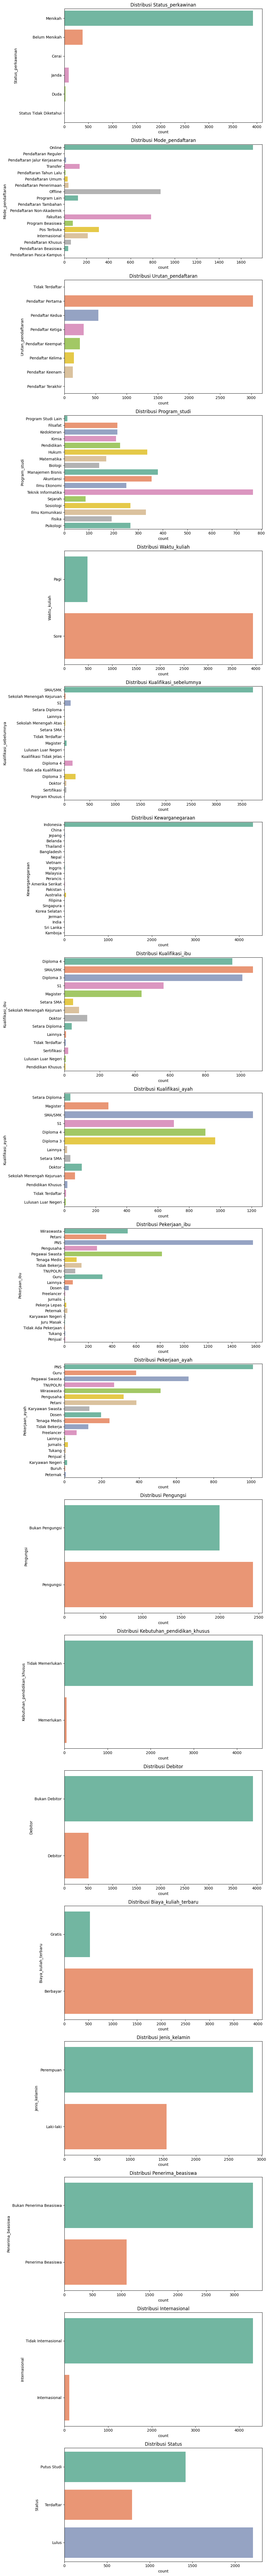

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom-kolom kategorikal yang telah disebutkan
categorical_columns = [
    'Status_perkawinan',
    'Mode_pendaftaran',
    'Urutan_pendaftaran',
    'Program_studi',
    'Waktu_kuliah',
    'Kualifikasi_sebelumnya',
    'Kewarganegaraan',
    'Kualifikasi_ibu',
    'Kualifikasi_ayah',
    'Pekerjaan_ibu',
    'Pekerjaan_ayah',
    'Pengungsi',
    'Kebutuhan_pendidikan_khusus',
    'Debitor',
    'Biaya_kuliah_terbaru',
    'Jenis_kelamin',
    'Penerima_beasiswa',
    'Internasional',
    'Status'
]

# Cek apakah kolom-kolom tersebut ada dalam dataset
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Menentukan ukuran plot (tinggi lebih besar)
fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 5))

# Menggambar countplot untuk setiap kolom kategorikal
for i, feature in enumerate(categorical_columns):
    # Menggunakan palet warna yang berbeda untuk setiap plot
    sns.countplot(data=df, y=feature, ax=ax[i], palette='Set2')  # Palet warna bisa disesuaikan
    ax[i].set_title(f'Distribusi {feature}')  # Menambahkan judul pada setiap plot

# Menampilkan plot
plt.tight_layout()  # Memastikan layout tidak tumpang tindih
plt.show()


13. Visualisasi Distribusi Data Numerik Menggunakan Boxplot

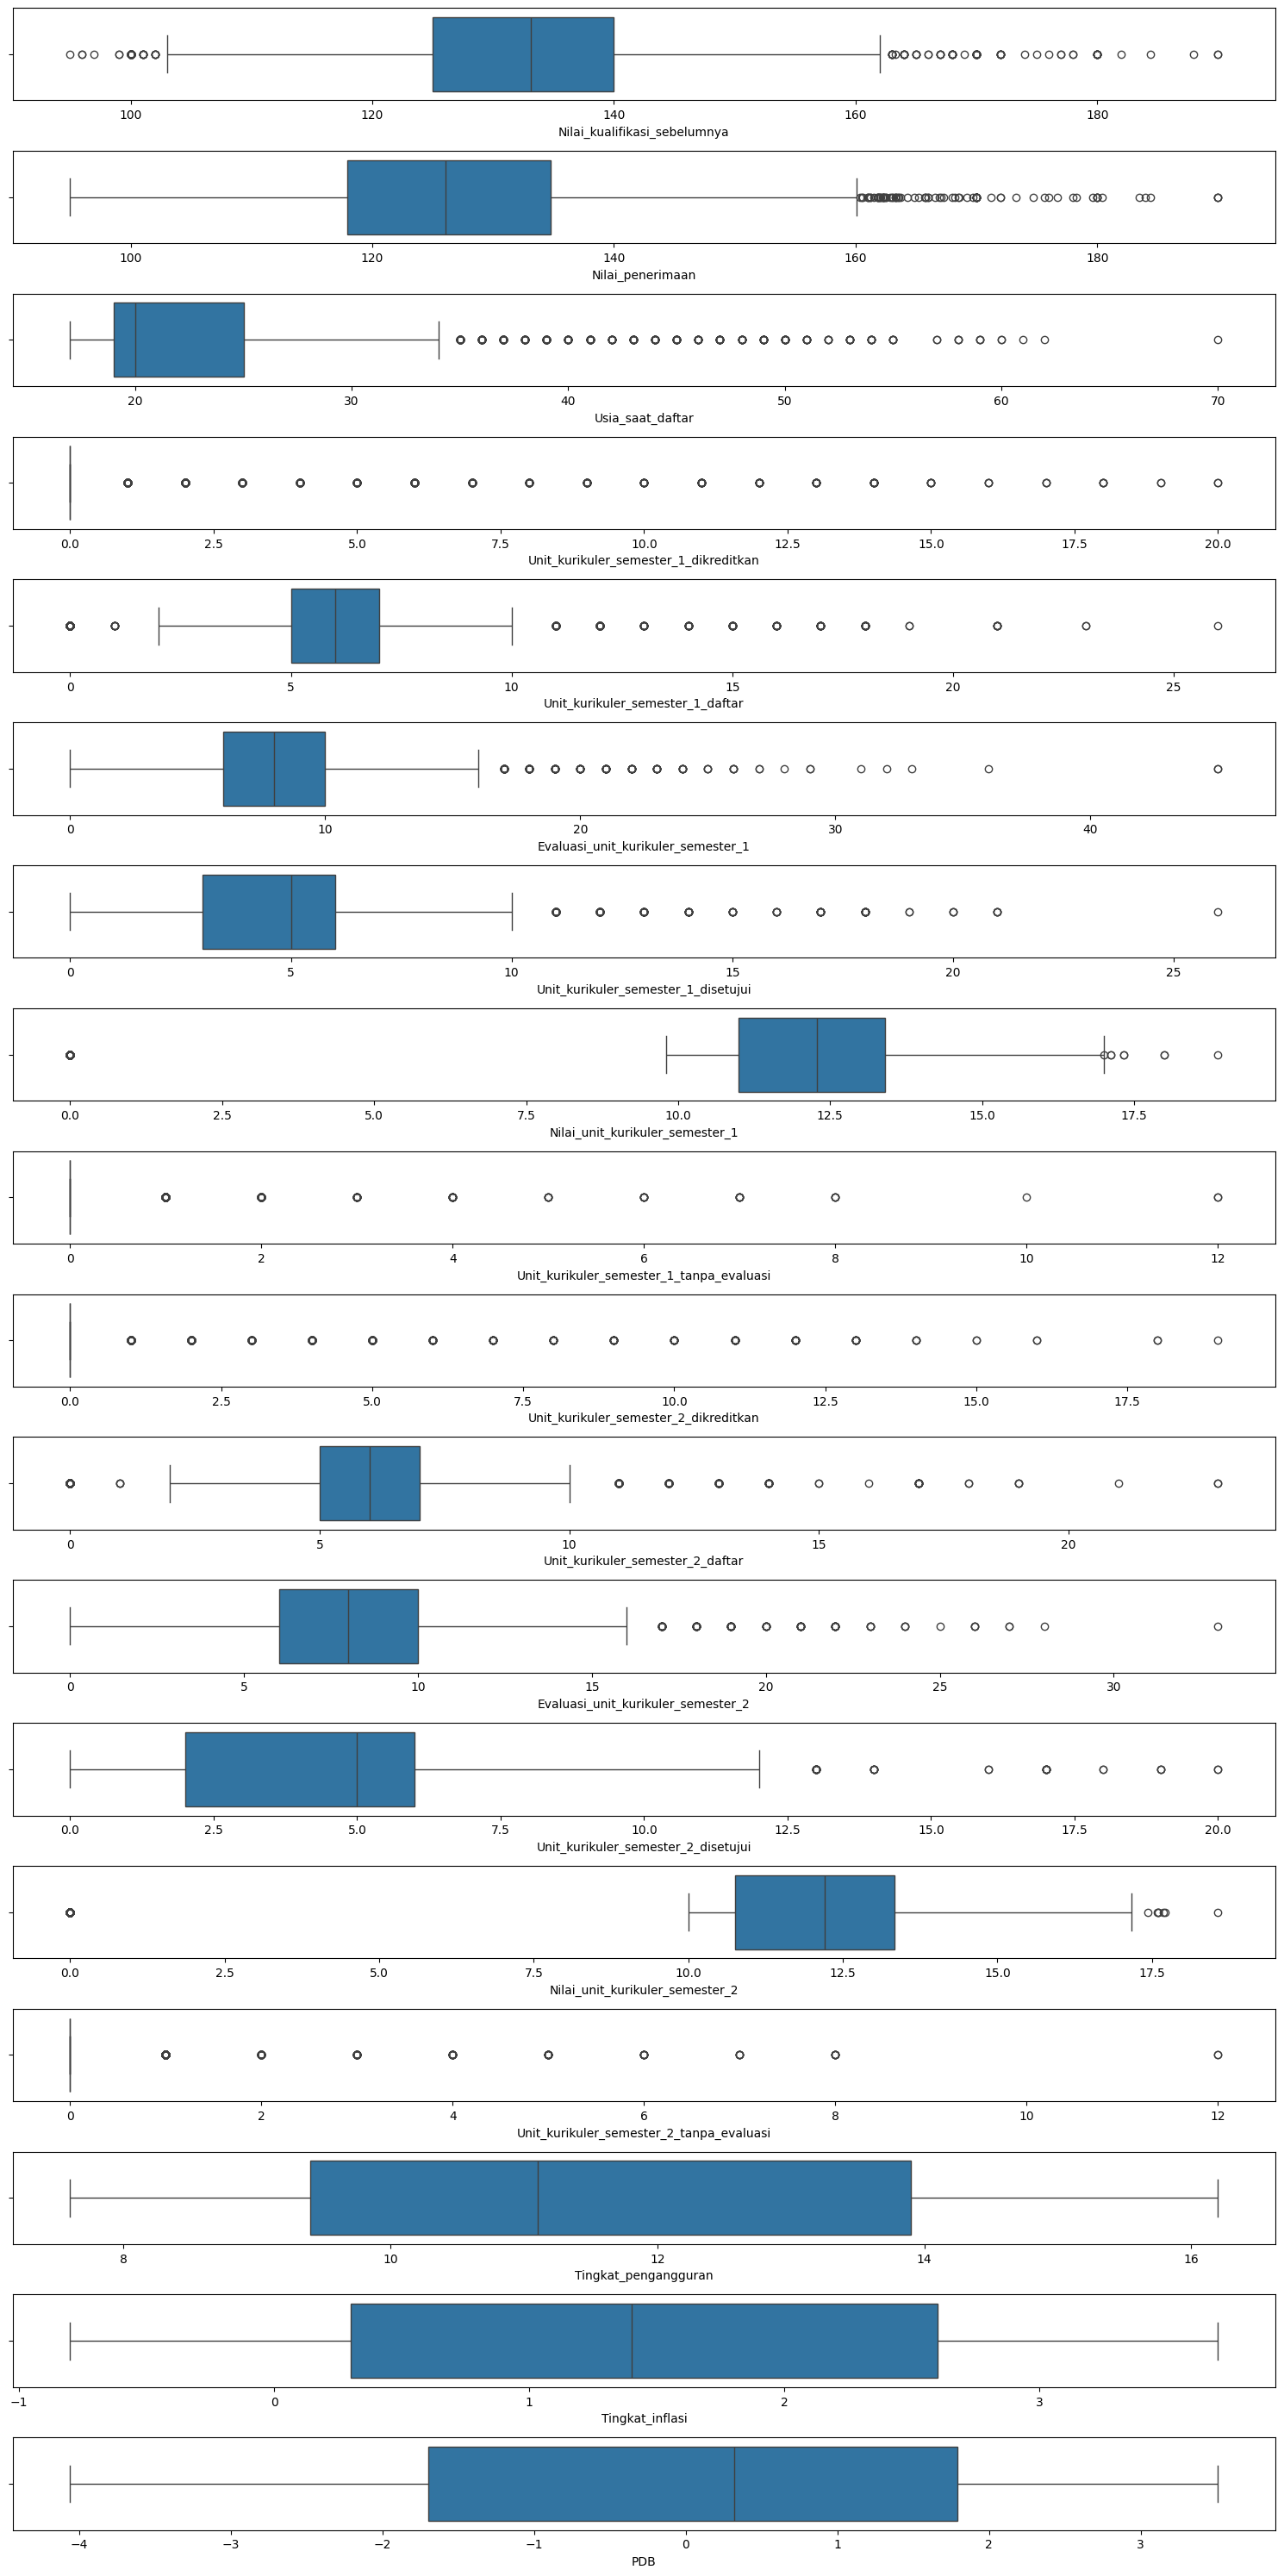

In [15]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=df # Changed cleaned_df to df
)

14. Visualisasi Distribusi Data Numerik Berdasarkan Status Menggunakan Boxplot

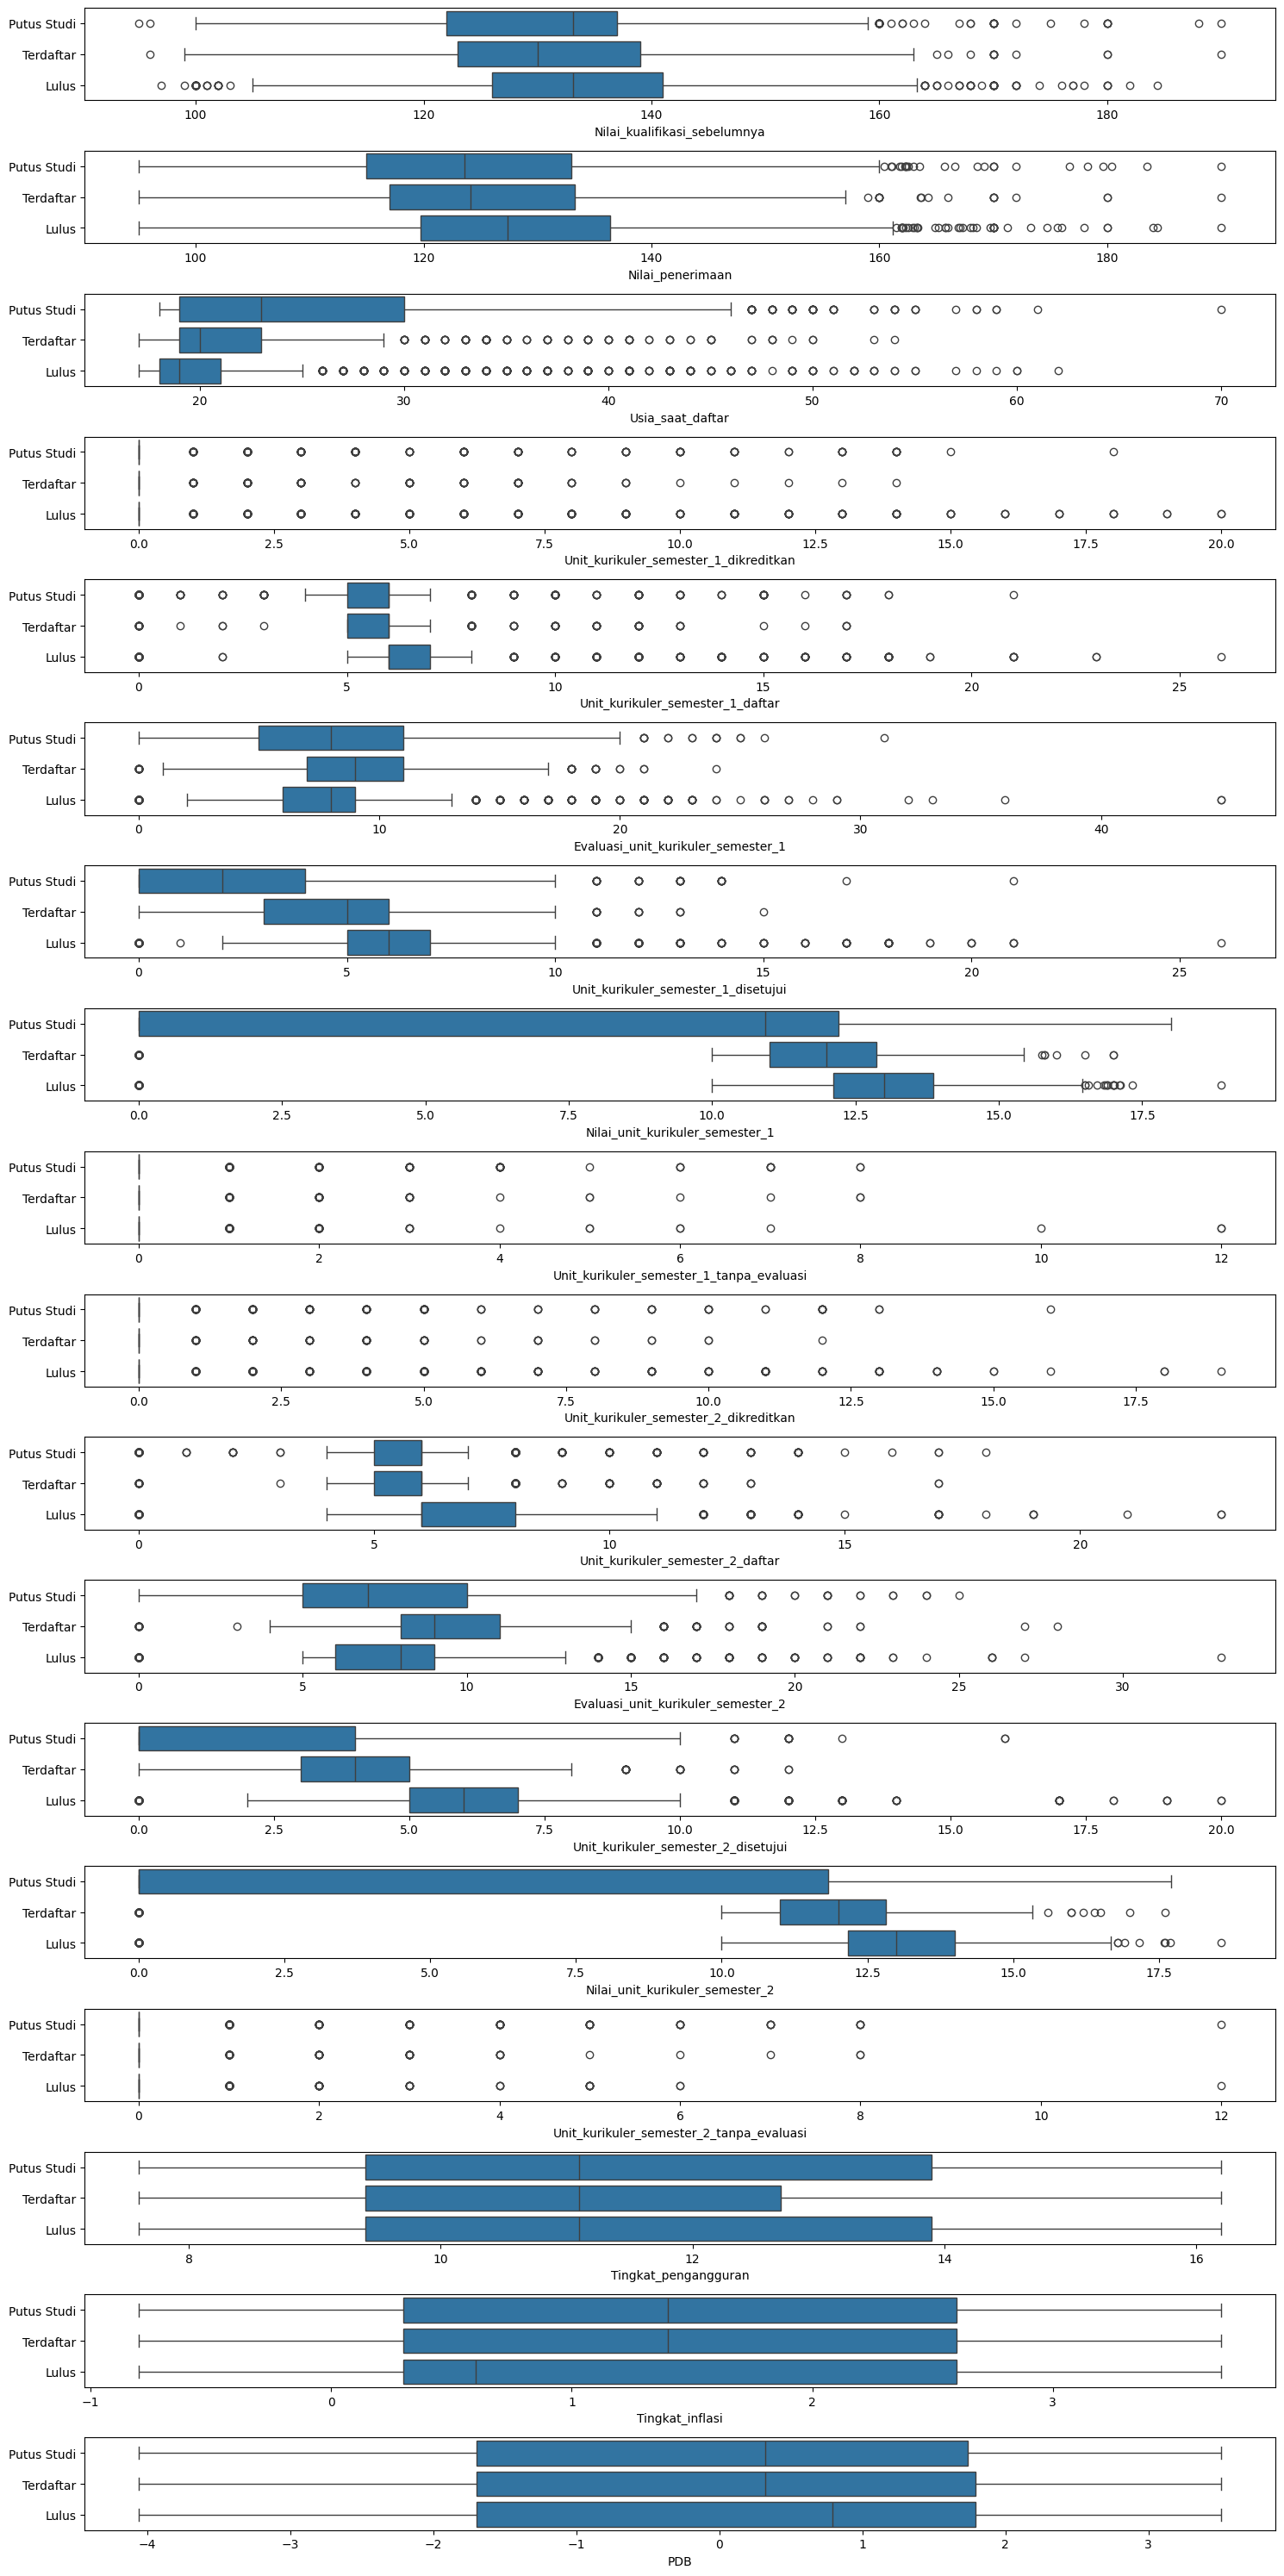

In [16]:
numerical_dis_plot(
    features=numerical_columns,
    df=df,  # Replace cleaned_df with df
    segment_feature="Status"
)

15. Visualisasi Distribusi Kategorikal Berdasarkan Status Menggunakan Countplot

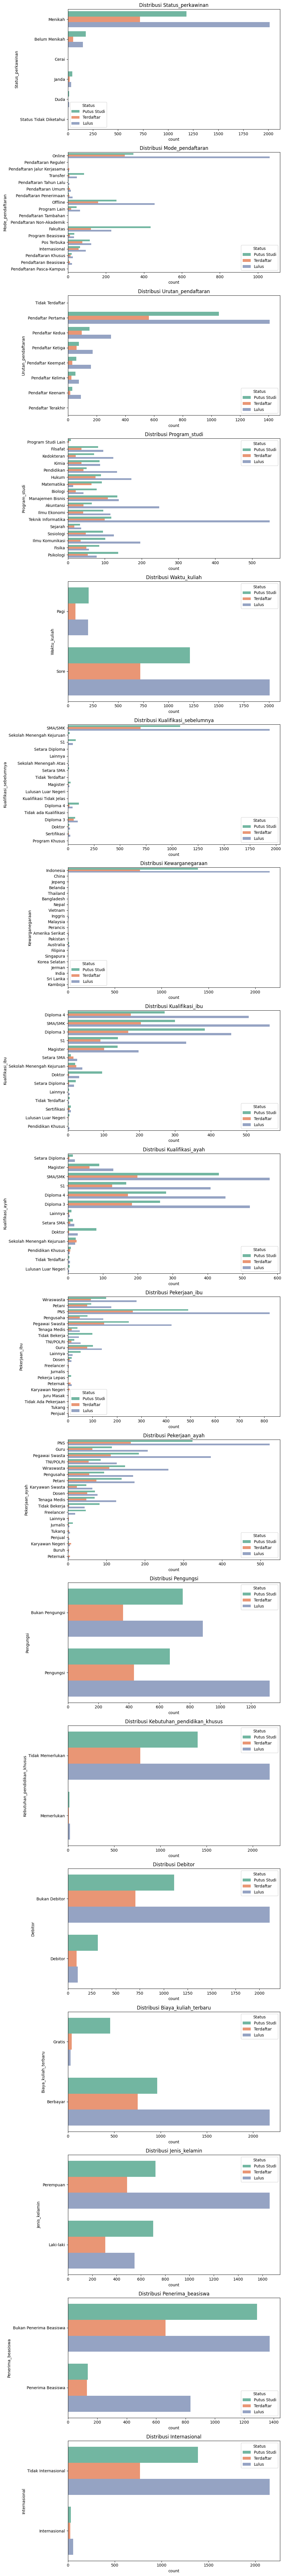

In [17]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, len(features) * 5))  # Sesuaikan ukuran plot
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=feature, hue=segment_feature, ax=ax[i], palette='Set2')  # Segmentasi berdasarkan fitur
        else:
            sns.countplot(data=df, y=feature, ax=ax[i], palette='Set2')  # Tanpa segmentasi
        ax[i].set_title(f'Distribusi {feature}')  # Menambahkan judul pada setiap plot

    plt.tight_layout()
    plt.show()

# Menjalankan fungsi untuk kolom-kolom Status yang telah disebutkan
categorical_plot(
    features=[
        'Status_perkawinan',
        'Mode_pendaftaran',
        'Urutan_pendaftaran',
        'Program_studi',
        'Waktu_kuliah',
        'Kualifikasi_sebelumnya',
        'Kewarganegaraan',
        'Kualifikasi_ibu',
        'Kualifikasi_ayah',
        'Pekerjaan_ibu',
        'Pekerjaan_ayah',
        'Pengungsi',
        'Kebutuhan_pendidikan_khusus',
        'Debitor',
        'Biaya_kuliah_terbaru',
        'Jenis_kelamin',
        'Penerima_beasiswa',
        'Internasional',
    ],
    df=df,  # Pastikan df sesuai dengan dataframe yang Anda gunakan
    segment_feature="Status"  # Menambahkan segmentasi berdasarkan "Credit_Score"
)


16. Visualisasi Korelasi Antar Fitur Numerik Menggunakan Heatmap

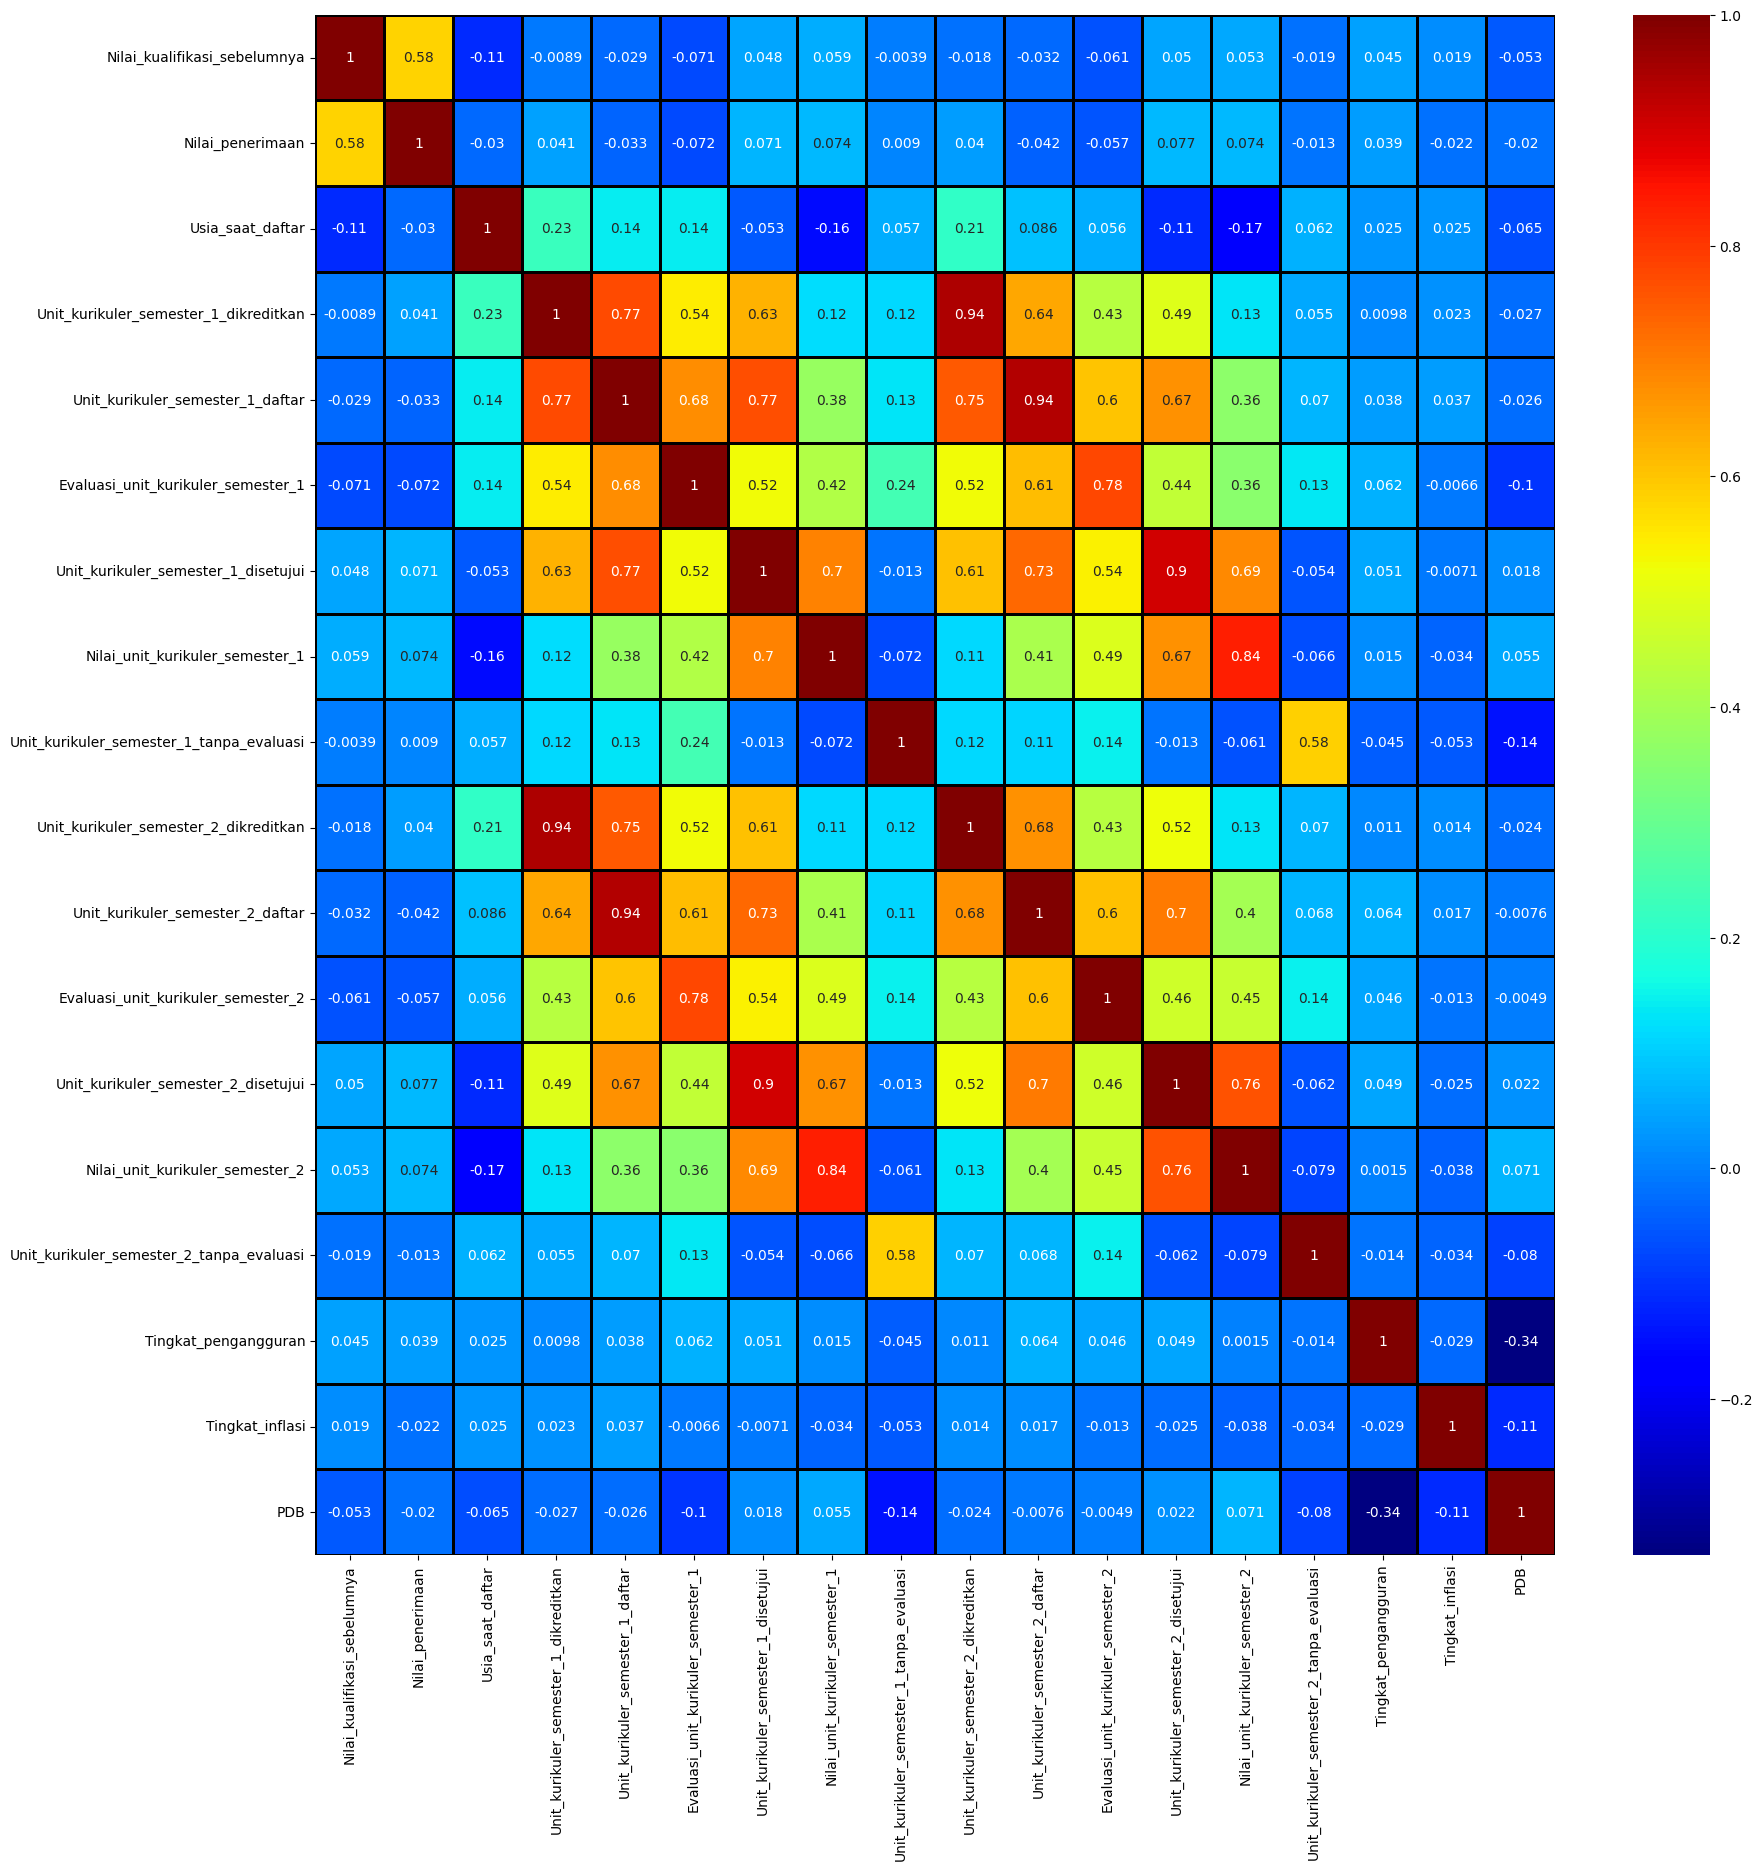

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1) # Replace new_df with df
plt.show()

## Preprocessing

1. melihat informasi dataframe

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Status_perkawinan                         4424 non-null   category
 1   Mode_pendaftaran                          4424 non-null   category
 2   Urutan_pendaftaran                        4424 non-null   category
 3   Program_studi                             4424 non-null   category
 4   Waktu_kuliah                              4424 non-null   category
 5   Kualifikasi_sebelumnya                    4424 non-null   category
 6   Nilai_kualifikasi_sebelumnya              4424 non-null   float64 
 7   Kewarganegaraan                           4424 non-null   category
 8   Kualifikasi_ibu                           4387 non-null   object  
 9   Kualifikasi_ayah                          4378 non-null   object  
 10  Pekerjaan_ibu           

2. Pembersihan Data: Menghapus Kolom yang Tidak Digunakan pada DataFrame

In [21]:
import pandas as pd

# Misal df adalah DataFrame yang sudah ada
# Daftar kolom yang tidak digunakan
unused_columns = [
    'Kualifikasi_ibu',
    'Kualifikasi_ayah',
    'Pekerjaan_ibu',
    'Pekerjaan_ayah',
    'Biaya_kuliah_terbaru',
    'Tingkat_pengangguran',
    'Tingkat_inflasi',
    'PDB',
    'Status_perkawinan',
    'Kewarganegaraan',
    'Pengungsi',
    'Debitor',
    'Internasional',
    'Pengungsi'
]

# Hapus kolom yang tidak digunakan
df_cleaned = df.drop(columns=unused_columns)

# Cek DataFrame setelah penghapusan
print(df_cleaned.head())

   Mode_pendaftaran Urutan_pendaftaran    Program_studi Waktu_kuliah  \
0           Offline   Pendaftar Kelima         Filsafat         Sore   
1  Pendaftaran Umum  Pendaftar Pertama     Ilmu Ekonomi         Sore   
2            Online   Pendaftar Kelima       Pendidikan         Sore   
3           Offline    Pendaftar Kedua  Ilmu Komunikasi         Sore   
4          Fakultas  Pendaftar Pertama       Kedokteran         Pagi   

  Kualifikasi_sebelumnya  Nilai_kualifikasi_sebelumnya  Nilai_penerimaan  \
0                SMA/SMK                         122.0             127.3   
1                SMA/SMK                         160.0             142.5   
2                SMA/SMK                         122.0             124.8   
3                SMA/SMK                         122.0             119.6   
4                SMA/SMK                         100.0             141.5   

  Kebutuhan_pendidikan_khusus Jenis_kelamin        Penerima_beasiswa  ...  \
0            Tidak Memerlukan    

3. Pembagian Data: Membagi Data ke dalam Set Pelatihan dan Pengujian

In [22]:
from sklearn.model_selection import train_test_split

# Use df_cleaned instead of new_cleaned_df
train_df, test_df = train_test_split(df_cleaned, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(4202, 24)
(222, 24)


4. Distribusi Status dalam Dataset Pelatihan

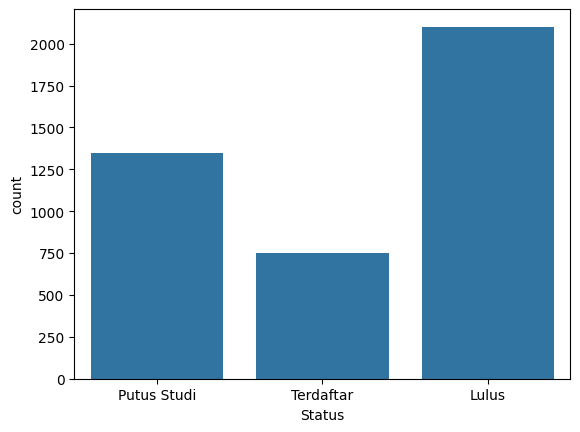

In [23]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [24]:
train_df.Status.value_counts()

Status
Lulus          2101
Putus Studi    1349
Terdaftar       752
Name: count, dtype: int64

**Undersampled**

In [25]:
df_majority_1 = train_df[(train_df.Status == "Lulus")]
df_majority_2 = train_df[(train_df.Status == "Putus Studi")]
df_minority = train_df[(train_df.Status == "Terdaftar")]

In [26]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=752, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=752, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(752, 24)
(752, 24)


In [27]:
from sklearn.utils import shuffle

undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Nilai_kualifikasi_sebelumnya,Nilai_penerimaan,Kebutuhan_pendidikan_khusus,Jenis_kelamin,Penerima_beasiswa,...,Unit_kurikuler_semester_1_disetujui,Nilai_unit_kurikuler_semester_1,Unit_kurikuler_semester_1_tanpa_evaluasi,Unit_kurikuler_semester_2_dikreditkan,Unit_kurikuler_semester_2_daftar,Evaluasi_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_disetujui,Nilai_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_tanpa_evaluasi,Status
632,Offline,Pendaftar Pertama,Ilmu Ekonomi,Sore,SMA/SMK,122.0,112.9,Tidak Memerlukan,Perempuan,Bukan Penerima Beasiswa,...,4.0,12.25,0.0,0.0,6.0,11.0,3.0,11.33,0.0,Terdaftar
368,Offline,Pendaftar Pertama,Akuntansi,Sore,SMA/SMK,144.0,126.9,Tidak Memerlukan,Perempuan,Bukan Penerima Beasiswa,...,5.0,10.60,0.0,0.0,6.0,11.0,4.0,10.50,0.0,Lulus
1095,Online,Pendaftar Pertama,Teknik Informatika,Sore,SMA/SMK,130.0,129.1,Tidak Memerlukan,Perempuan,Bukan Penerima Beasiswa,...,7.0,13.04,0.0,0.0,8.0,10.0,8.0,13.60,0.0,Lulus
1438,Offline,Pendaftar Pertama,Sosiologi,Sore,SMA/SMK,134.0,125.3,Tidak Memerlukan,Laki-laki,Penerima Beasiswa,...,4.0,13.75,0.0,0.0,6.0,10.0,6.0,11.56,0.0,Lulus
761,Pendaftaran Tahun Lalu,Pendaftar Pertama,Hukum,Sore,SMA/SMK,134.0,134.0,Tidak Memerlukan,Perempuan,Bukan Penerima Beasiswa,...,5.0,14.20,0.0,0.0,5.0,10.0,5.0,12.20,0.0,Lulus


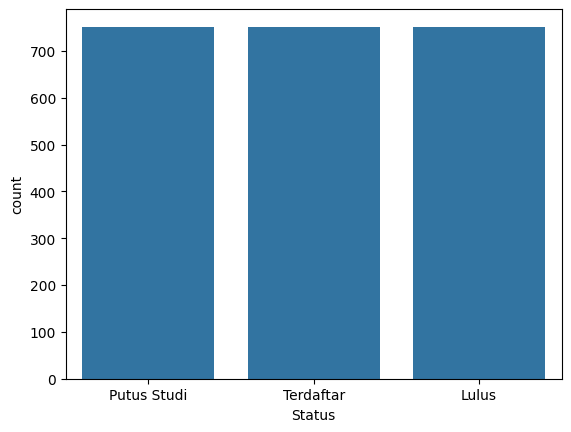

In [28]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

**Oversampled**

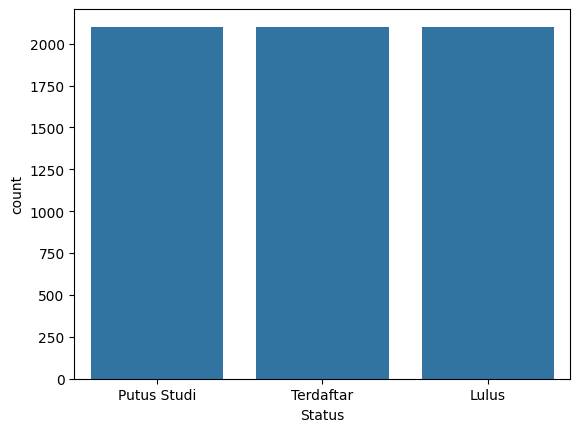

In [29]:
from sklearn.utils import resample
from sklearn.utils import shuffle

df_majority_1 = train_df[(train_df.Status == "Lulus")]
df_majority_2 = train_df[(train_df.Status == "Putus Studi")]
df_minority = train_df[(train_df.Status == "Terdaftar")]


df_majority_2_undersampled = resample(df_majority_2, n_samples=2101, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2101, random_state=42)

oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [30]:
oversampled_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Mode_pendaftaran                          6303 non-null   category
 1   Urutan_pendaftaran                        6303 non-null   category
 2   Program_studi                             6303 non-null   category
 3   Waktu_kuliah                              6303 non-null   category
 4   Kualifikasi_sebelumnya                    6303 non-null   category
 5   Nilai_kualifikasi_sebelumnya              6303 non-null   float64 
 6   Nilai_penerimaan                          6303 non-null   float64 
 7   Kebutuhan_pendidikan_khusus               6303 non-null   category
 8   Jenis_kelamin                             6303 non-null   category
 9   Penerima_beasiswa                         6303 non-null   category
 10  Usia_saat_daftar        

**Encoding dan Scaling**

Persiapan Data untuk Model: Memisahkan Fitur dan Target

In [31]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

Normalisasi dan Encoding Data: Persiapan untuk Pemodelan

In [32]:
import os

# Membuat folder 'model' jika belum ada
if not os.path.exists('model'):
    os.makedirs('model')


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

Praproses Data: Normalisasi dan Encoding untuk Fitur Numerik dan Kategorikal

In [36]:
numerical_columns = [
    'Nilai_kualifikasi_sebelumnya',
    'Nilai_penerimaan',
    'Usia_saat_daftar',
    'Unit_kurikuler_semester_1_dikreditkan',
    'Unit_kurikuler_semester_1_daftar',
    'Evaluasi_unit_kurikuler_semester_1',
    'Unit_kurikuler_semester_1_disetujui',
    'Nilai_unit_kurikuler_semester_1',
    'Unit_kurikuler_semester_1_tanpa_evaluasi',
    'Unit_kurikuler_semester_2_dikreditkan',
    'Unit_kurikuler_semester_2_daftar',
    'Evaluasi_unit_kurikuler_semester_2',
    'Unit_kurikuler_semester_2_disetujui',
    'Nilai_unit_kurikuler_semester_2',
    'Unit_kurikuler_semester_2_tanpa_evaluasi',
]

categorical_columns = [
    'Mode_pendaftaran',
    'Urutan_pendaftaran',
    'Program_studi',
    'Waktu_kuliah',
    'Kualifikasi_sebelumnya',
    'Kebutuhan_pendidikan_khusus',
    'Jenis_kelamin',
    'Penerima_beasiswa',

]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [37]:
new_train_df.head()

,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Nilai_kualifikasi_sebelumnya,Nilai_penerimaan,Kebutuhan_pendidikan_khusus,Jenis_kelamin,Penerima_beasiswa,...,Evaluasi_unit_kurikuler_semester_1,Unit_kurikuler_semester_1_disetujui,Nilai_unit_kurikuler_semester_1,Unit_kurikuler_semester_1_tanpa_evaluasi,Unit_kurikuler_semester_2_dikreditkan,Unit_kurikuler_semester_2_daftar,Evaluasi_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_disetujui,Nilai_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_tanpa_evaluasi
0,0,5,1,1,1,0.394681,0.263158,1,0,0,...,0.200000,0.153846,0.648835,0.166667,0.0,0.217391,0.242424,0.20,0.632741,0.0
1,16,5,7,0,8,0.436170,0.294737,1,1,0,...,0.288889,0.153846,0.572034,0.000000,0.0,0.260870,0.454545,0.20,0.646204,0.0
2,3,5,15,1,8,0.457447,0.374737,1,1,0,...,0.133333,0.230769,0.653072,0.000000,0.0,0.260870,0.212121,0.25,0.764674,0.0
3,3,5,9,1,8,0.361702,0.387368,1,1,1,...,0.177778,0.076923,0.556144,0.000000,0.0,0.217391,0.333333,0.15,0.717824,0.0
4,2,0,7,0,8,0.255319,0.237895,1,1,0,...,0.177778,0.192308,0.646186,0.000000,0.0,0.260870,0.212121,0.30,0.646204,0.0


Encoding Target Variable dengan LabelEncoder dan Penyimpanan Model Encoder

In [38]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

Hasilnya ..

In [39]:
new_y_train

array([0, 0, 0, ..., 2, 2, 0])

In [40]:
new_y_test

array([1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2,
       2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       0, 0])

**Principal Component Analysis (PCA)**

Menentukan Kolom Numerik untuk Penerapan PCA pada Data Pendidikan

In [41]:
pca_numerical_columns_1 = [
    'Nilai_kualifikasi_sebelumnya',
    'Nilai_penerimaan',
    'Usia_saat_daftar',

]

pca_numerical_columns_2 = [
    'Unit_kurikuler_semester_1_dikreditkan',
    'Unit_kurikuler_semester_1_daftar',
    'Evaluasi_unit_kurikuler_semester_1',
    'Unit_kurikuler_semester_1_disetujui',
    'Nilai_unit_kurikuler_semester_1',
    'Unit_kurikuler_semester_1_tanpa_evaluasi',
    'Unit_kurikuler_semester_2_dikreditkan',
    'Unit_kurikuler_semester_2_daftar',
    'Evaluasi_unit_kurikuler_semester_2',
    'Unit_kurikuler_semester_2_disetujui',
    'Nilai_unit_kurikuler_semester_2',
    'Unit_kurikuler_semester_2_tanpa_evaluasi',
]

Mempersiapkan Data untuk PCA dengan Reset Index pada Data Latih dan Data Uji

In [42]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

Penerapan PCA pada Data Latih: Menampilkan Varians yang Dijelaskan dan Varians Kumulatif

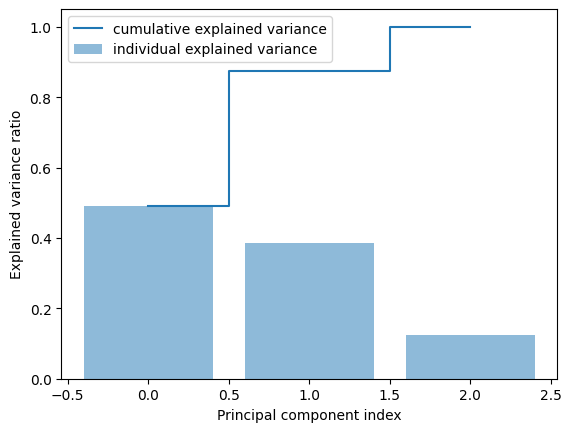

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Penerapan PCA dengan 3 Komponen Utama pada Data Latih dan Penyimpanan Model

In [44]:
pca_1 = PCA(n_components=3, random_state=123) # Change n_components to 3 or less
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
# Adjust the number of columns to match n_components
train_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Kebutuhan_pendidikan_khusus,Jenis_kelamin,Penerima_beasiswa,Unit_kurikuler_semester_1_dikreditkan,Unit_kurikuler_semester_1_daftar,...,Unit_kurikuler_semester_1_tanpa_evaluasi,Unit_kurikuler_semester_2_dikreditkan,Unit_kurikuler_semester_2_daftar,Evaluasi_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_disetujui,Nilai_unit_kurikuler_semester_2,Unit_kurikuler_semester_2_tanpa_evaluasi,pc1_1,pc1_2,pc1_3
0,0,5,1,1,1,1,0,0,0.0,0.192308,...,0.166667,0.0,0.217391,0.242424,0.20,0.632741,0.0,-0.121283,0.648232,-0.082891
1,16,5,7,0,8,1,1,0,0.0,0.230769,...,0.000000,0.0,0.260870,0.454545,0.20,0.646204,0.0,0.012633,-0.074266,-0.059222
2,3,5,15,1,8,1,1,0,0.0,0.230769,...,0.000000,0.0,0.260870,0.212121,0.25,0.764674,0.0,0.091427,-0.108237,-0.020940
3,3,5,9,1,8,1,1,1,0.0,0.192308,...,0.000000,0.0,0.217391,0.333333,0.15,0.717824,0.0,0.035745,-0.088450,0.058611
4,2,0,7,0,8,1,1,0,0.0,0.230769,...,0.000000,0.0,0.260870,0.212121,0.30,0.646204,0.0,-0.145630,-0.109992,0.041319


Visualisasi Variansi yang Dijelaskan oleh PCA pada Data Latih dengan Kolom-kolom Kurikuler

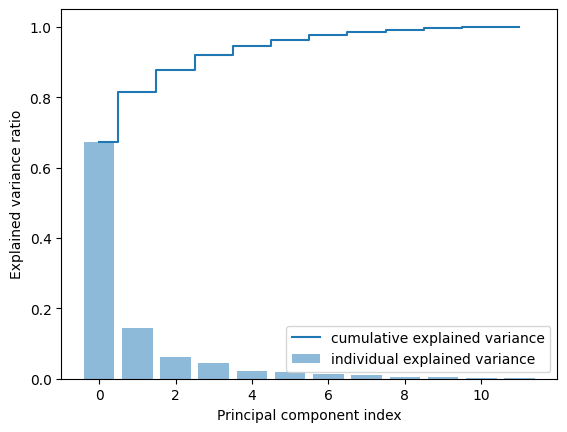

In [45]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Penerapan PCA dengan 2 Komponen Utama pada Data Latih dengan Kolom Kurikuler

In [46]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Kebutuhan_pendidikan_khusus,Jenis_kelamin,Penerima_beasiswa,pc1_1,pc1_2,pc1_3,pc2_1,pc2_2
0,0,5,1,1,1,1,0,0,-0.121283,0.648232,-0.082891,0.106291,-0.104802
1,16,5,7,0,8,1,1,0,0.012633,-0.074266,-0.059222,0.130636,-0.001576
2,3,5,15,1,8,1,1,0,0.091427,-0.108237,-0.020940,0.225548,-0.121317
3,3,5,9,1,8,1,1,1,0.035745,-0.088450,0.058611,0.090127,-0.128757
4,2,0,7,0,8,1,1,0,-0.145630,-0.109992,0.041319,0.155598,-0.072881


Transformasi Data Uji Menggunakan PCA dengan 3 dan 2 Komponen Utama pada Fitur Numerik

In [47]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
# Change the number of columns to match n_components in pca_1
test_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_2 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_2, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Mode_pendaftaran,Urutan_pendaftaran,Program_studi,Waktu_kuliah,Kualifikasi_sebelumnya,Kebutuhan_pendidikan_khusus,Jenis_kelamin,Penerima_beasiswa,pc1_1,pc1_2,pc1_3,pc2_1,pc2_2
0,0,5,1,1,8,1,1,1,-0.142058,0.128737,-0.127709,-0.366317,0.080072
1,2,5,0,1,8,1,1,0,-0.091004,-0.127276,0.017304,0.149076,-0.054525
2,2,5,3,1,8,1,1,1,0.024491,-0.114647,0.005276,0.221519,-0.033476
3,2,0,15,1,8,1,0,0,-0.233307,-0.116961,0.105877,0.241843,-0.104984
4,0,5,16,1,8,1,1,0,-0.185983,0.056633,-0.125803,-0.714414,0.275478


### Modeling

Pada proyek ini, akan mengembangkan beberapa model menggunakan algoritma machine learning yang berbeda-beda. Kemudian,mengevaluasi performa asing-masing model lalu menentukan model mana yang memiliki performa terbaik. Nah, berikut merupakan beberapa algoritma yang akan digunakan.

- Decision tree
- Random forest
- Gradient Boosting

Selain beberapa algoritma machine learning di atas,juga akan menggunakan algoritma grid search untuk melakukan mencari parameter paling optimal dari suatu model.

**Grid Search**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\linear_model\_logisti

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

**Decision Tree**

Definisi Model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

Mencari Best Parameter

In [50]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


Menyimpan Model

In [51]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=6,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

**Random Forest**

Definisi Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

C:\Users\user\anaconda3\envs\status_mhs\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Mencari Best Parameter

In [53]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


Menyimpan Model

In [54]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

**Gradient Boosting**

Definisi Model

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

Mencari Best Parameter

In [56]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


Menyimpan Model

In [57]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

### Evaluation

**Metrik Evaluasi Model untuk Multiclass Classification**

Pada masalah klasifikasi, salah satu metrik utama yang harus diperhatikan adalah

1. **confusion matrix**. Metrik ini akan memberikan gambaran performa model pada berbagai kelas. Confusion matrix menunjukkan berapa banyak jumlah prediksi yang benar (True) dan salah (False) untuk setiap label. Berikut adalah contoh ilustrasi **confusion matrix** untuk multiclass classification:

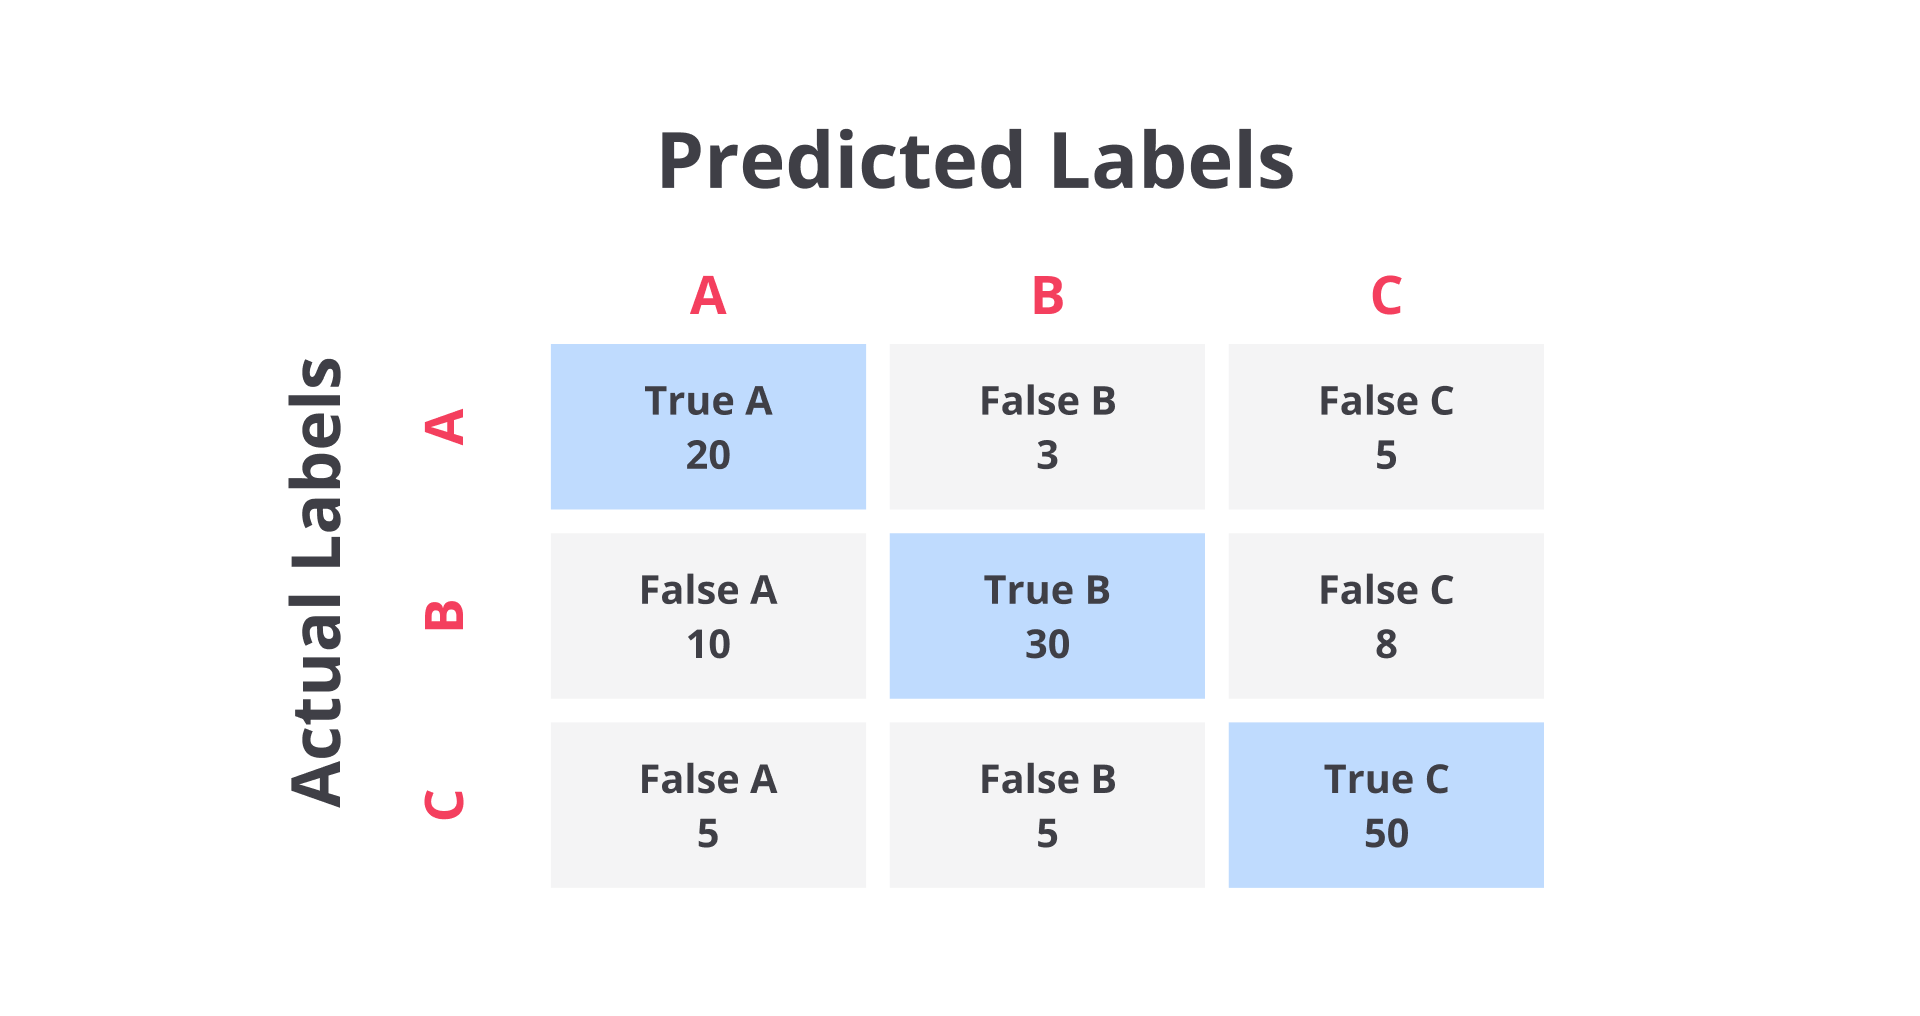

Berdasarkan hasil di atas, kita dapat melihat seberapa baik performa model dalam melakukan prediksi pada setiap kelas atau label. Ini sangat berguna terutama ketika berhadapan dengan data yang memiliki kelas tidak seimbang (**imbalance data**). Hasil dari confusion matrix ini juga digunakan untuk menghitung berbagai metrik lainnya seperti **accuracy**, **precision**, **recall**, dan **F1 score**.

2. ### Accuracy
**Accuracy** merupakan metrik yang paling umum digunakan untuk menilai seberapa banyak model menghasilkan hasil prediksi yang benar. Accuracy didefinisikan sebagai perbandingan antara jumlah prediksi yang benar dengan jumlah total seluruh sampel.
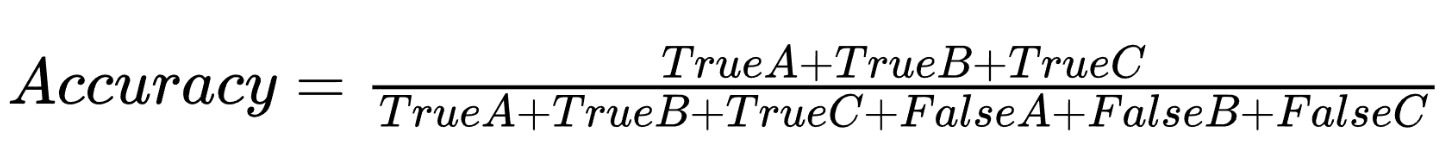


### Precision
**Precision** adalah metrik yang digunakan untuk mengukur berapa banyak model menghasilkan prediksi yang benar untuk suatu kelas tertentu. Precision didefinisikan sebagai perbandingan antara jumlah hasil prediksi yang benar untuk kelas tertentu dengan jumlah total prediksi untuk kelas tersebut.

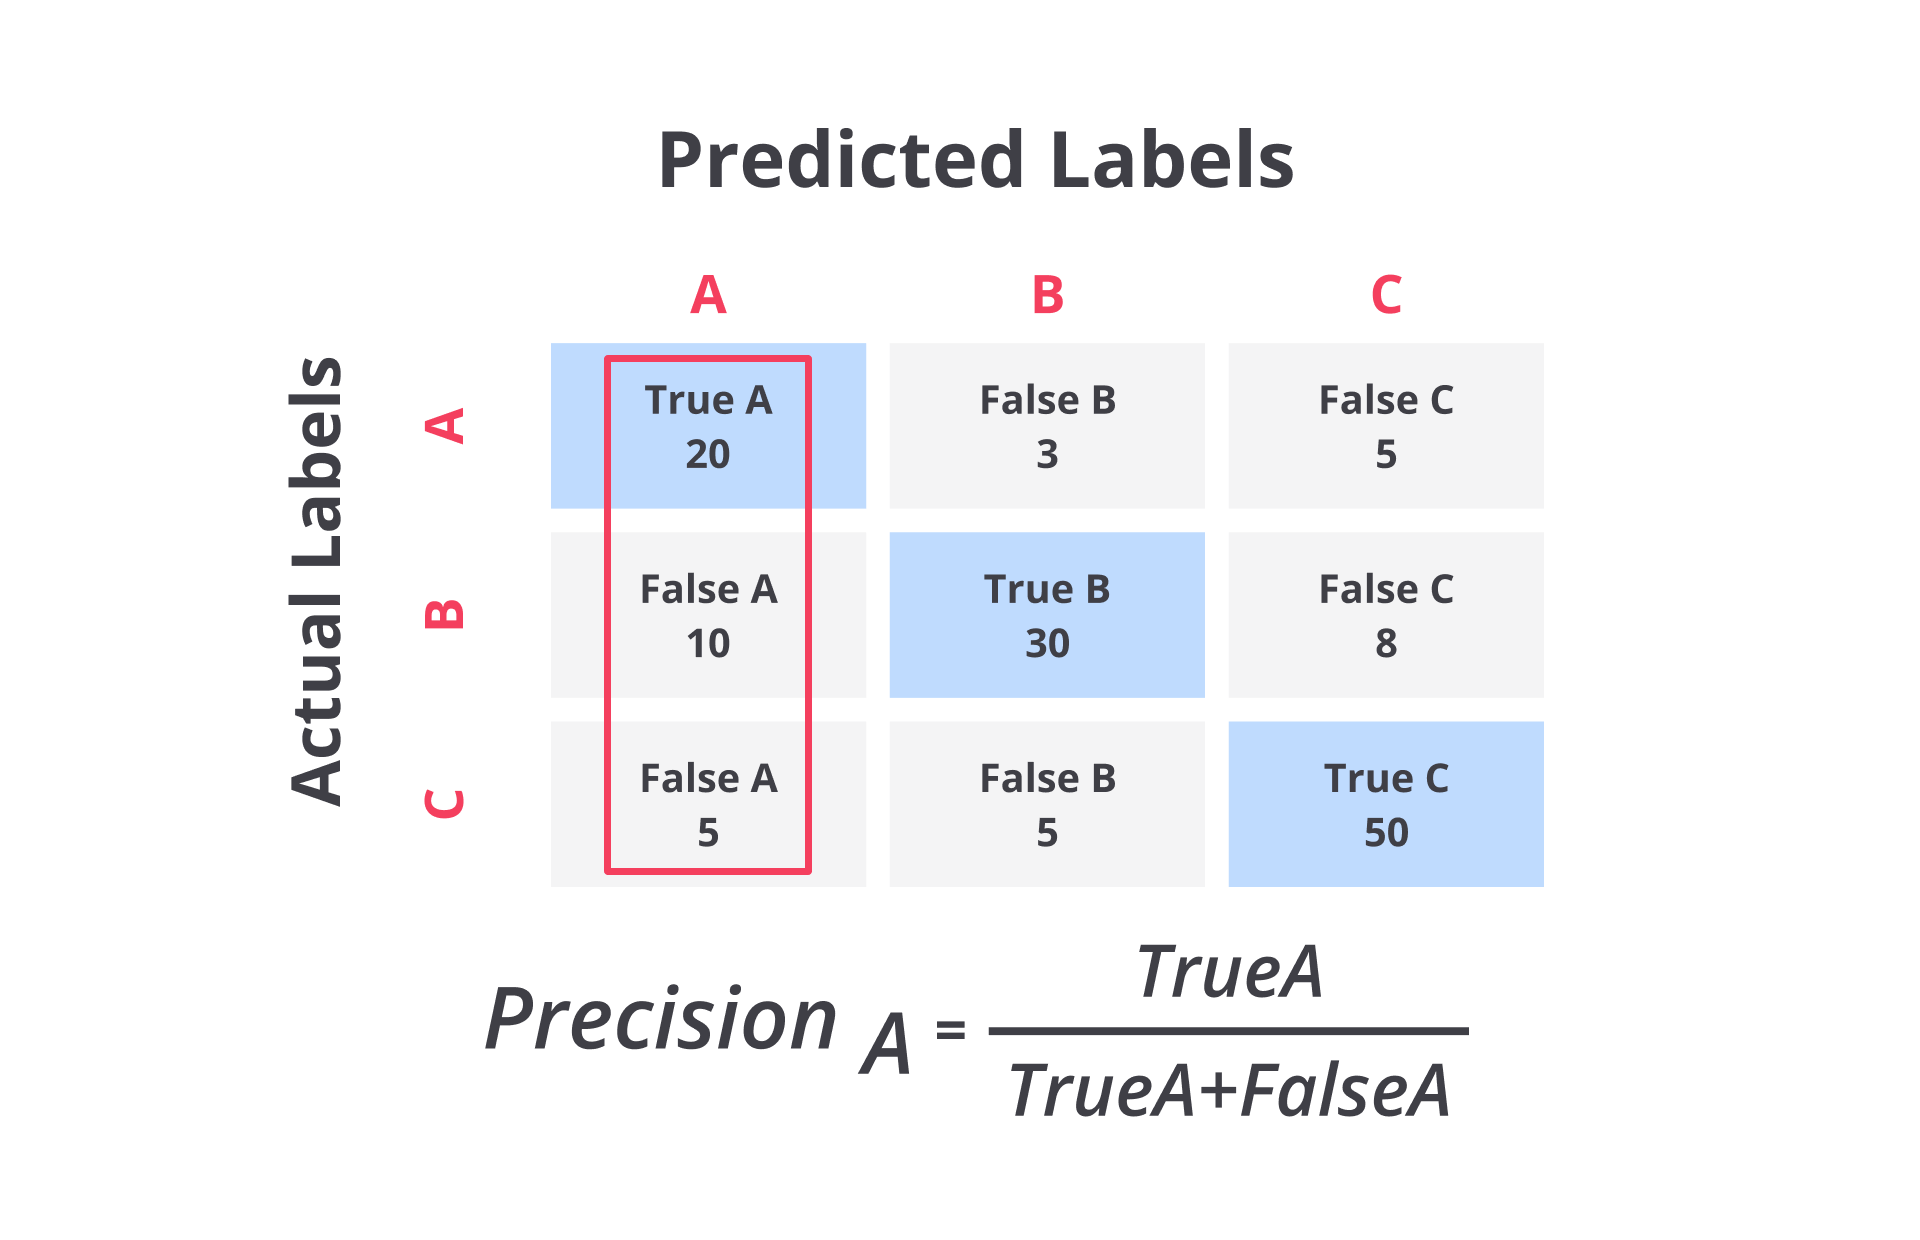

### Recall
**Recall** digunakan untuk mengukur seberapa baik model dalam memprediksi suatu kelas tertentu. Recall didefinisikan sebagai perbandingan antara jumlah hasil prediksi yang benar untuk kelas tertentu dengan jumlah total sampel pada kelas tersebut.

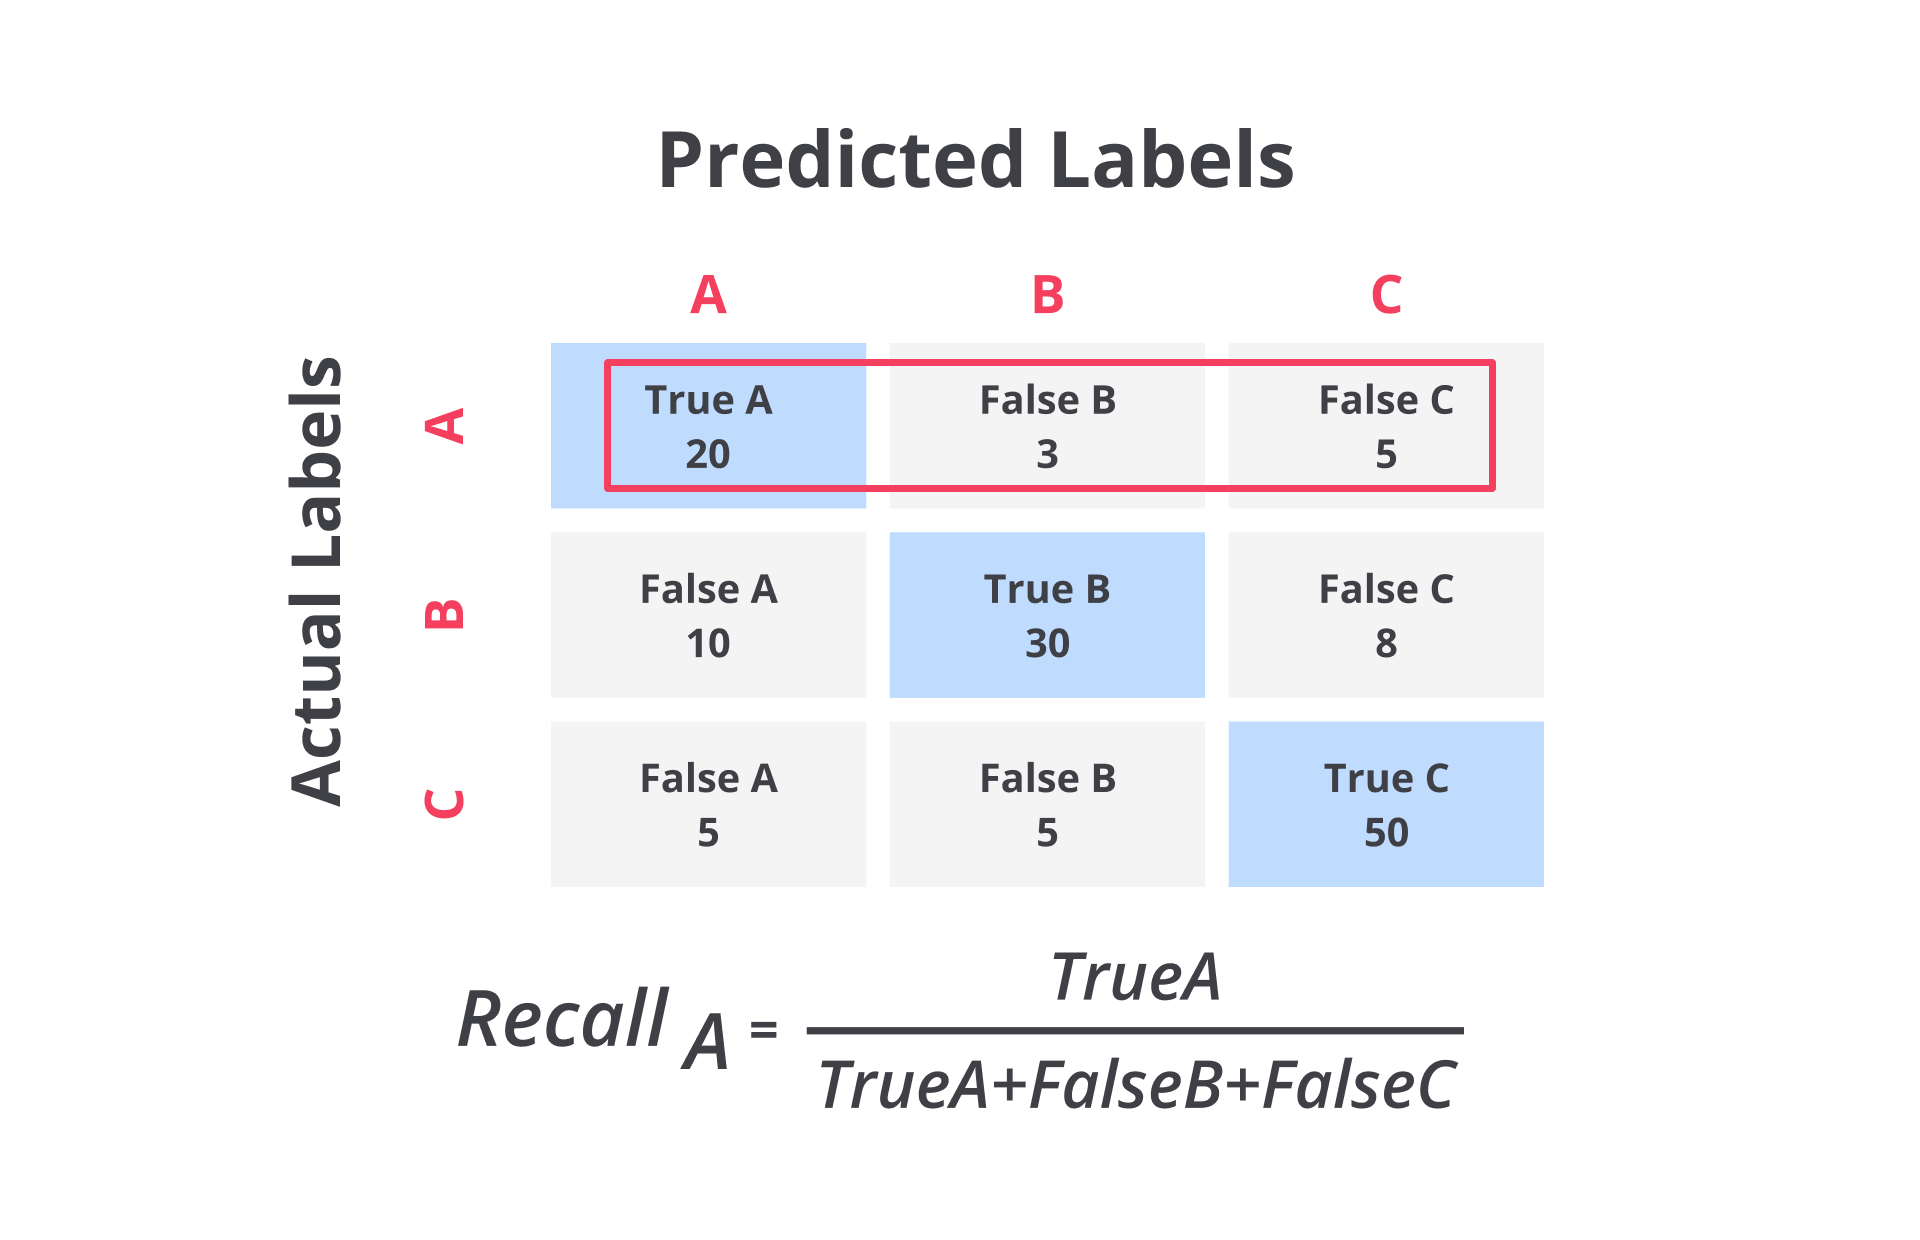

### F1 Score
**F1 score** adalah metrik yang sering digunakan sebagai kombinasi antara nilai precision dan recall dari suatu kelas tertentu. F1 score menggabungkan kedua metrik tersebut dalam satu angka yang memberikan gambaran keseimbangan antara precision dan recall.
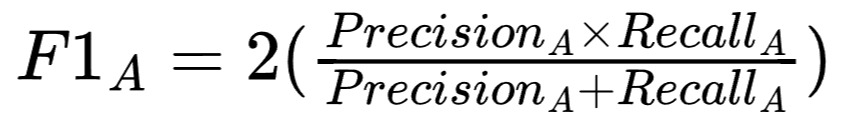


---

Itulah beberapa metrik yang dapat digunakan untuk mengevaluasi performa model dalam kasus **multiclass classification**. Dalam proyek ini, kelima metrik tersebut akan digunakan untuk mengevaluasi performa model secara keseluruhan.

Tanpa berlama-lama lagi, mari kita lihat contoh implementasi metrik evaluasi model pada proyek ini.


**Evaluasi Model**

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Lulus', 'Putus Studi', 'Terdaftar']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

Prediksi Kelas pada Data Uji Menggunakan Model Decision Tree dan Dekode Label Target

              precision    recall  f1-score   support

       Lulus       0.74      0.64      0.69       108
 Putus Studi       0.77      0.60      0.67        72
   Terdaftar       0.30      0.52      0.38        42

    accuracy                           0.60       222
   macro avg       0.60      0.59      0.58       222
weighted avg       0.67      0.60      0.62       222



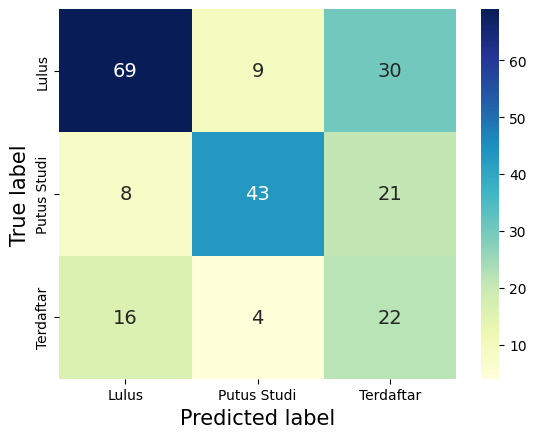

,Lulus,Putus Studi,Terdaftar
Lulus,69,9,30
Putus Studi,8,43,21
Terdaftar,16,4,22


In [59]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

Evaluasi Kinerja Model Random Forest pada Data Uji

              precision    recall  f1-score   support

       Lulus       0.76      0.75      0.75       108
 Putus Studi       0.78      0.62      0.69        72
   Terdaftar       0.35      0.48      0.40        42

    accuracy                           0.66       222
   macro avg       0.63      0.62      0.62       222
weighted avg       0.69      0.66      0.67       222



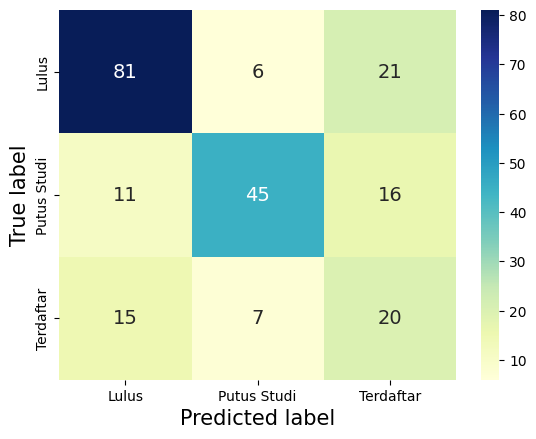

,Lulus,Putus Studi,Terdaftar
Lulus,81,6,21
Putus Studi,11,45,16
Terdaftar,15,7,20


In [60]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

Evaluasi Kinerja Model Gradient Boosting pada Data Uji

              precision    recall  f1-score   support

       Lulus       0.74      0.86      0.79       108
 Putus Studi       0.76      0.71      0.73        72
   Terdaftar       0.55      0.38      0.45        42

    accuracy                           0.72       222
   macro avg       0.68      0.65      0.66       222
weighted avg       0.71      0.72      0.71       222



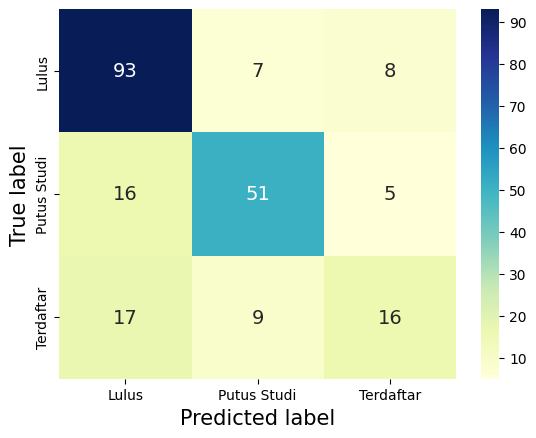

,Lulus,Putus Studi,Terdaftar
Lulus,93,7,8
Putus Studi,16,51,5
Terdaftar,17,9,16


In [61]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

Visualisasi dan Identifikasi Fitur Penting Berdasarkan Model Gradient Boosting

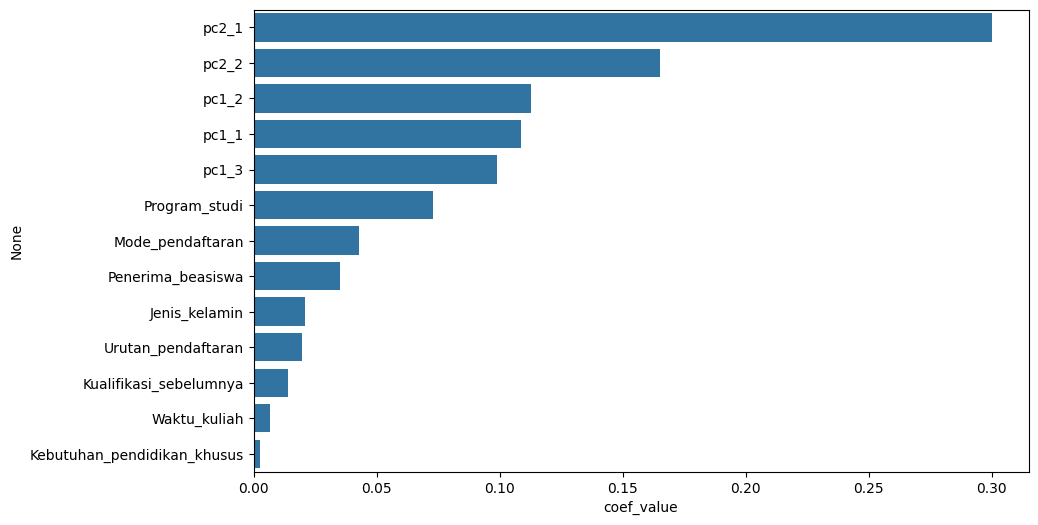

,coef_value
pc2_1,0.299933
pc2_2,0.165083
pc1_2,0.112759
pc1_1,0.108868
pc1_3,0.098947
Program_studi,0.072999
Mode_pendaftaran,0.042764
Penerima_beasiswa,0.035028
Jenis_kelamin,0.020799
Urutan_pendaftaran,0.019529


In [62]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)